In [1]:
import numpy as np
from scipy.linalg import inv
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Confidence Regions

Here we are going to analyze the Fisher Matrices obtain for each cosmology: 

1. Confidence Regions

2. Figure of Merit (FoM)

In [2]:
Omega_c0 = 0.2685628338348412

Omega_nu0 = 0.00143717

Omega_b0 = 0.05

Omega_m0 = Omega_c0 + Omega_nu0 + Omega_b0

Omega_DE0 = Omega_lambda = (1-Omega_m0)

w0= -1

wa = 0

Omega_K0 = 1 - (Omega_m0 + Omega_DE0)

h = 0.67

c = 299792

sigma8 = 0.816

ns = 0.96

gamma = 6/11

In [3]:
def plot_error_ellipse(ax, cov, pos, nstd=2, **kwargs):
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]
    theta = np.degrees(np.arctan2(*eigvecs[:, 0][::-1]))
    width, height = 2 * nstd * np.sqrt(eigvals)
    ellipse = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwargs)
    ax.add_patch(ellipse)

# $\Lambda CDM$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $n_s$

5. $\sigma_8$

In [4]:
Fi_S_F = np.array([[ 1114062.34444458,  3628548.35880427,  1278759.05000664,
         -117573.77043843,   818403.1710311 ],
       [ 3628548.35880427, 12550927.09696479,  4627332.37629999,
         -517504.58531668,  2737870.37248902],
       [ 1278759.05000664,  4627332.37629999,  1855103.72973513,
         -218418.67971088,   975971.74155768],
       [ -117573.77043843,  -517504.58531668,  -218418.67971088,
           84679.65531234,   -60248.34325895],
       [  818403.1710311 ,  2737870.37248902,  975971.74155768,
          -60248.34325895,   648242.19473655]])

In [46]:
cov_matrix = inv(Fi_S_F)

### Confidence regions

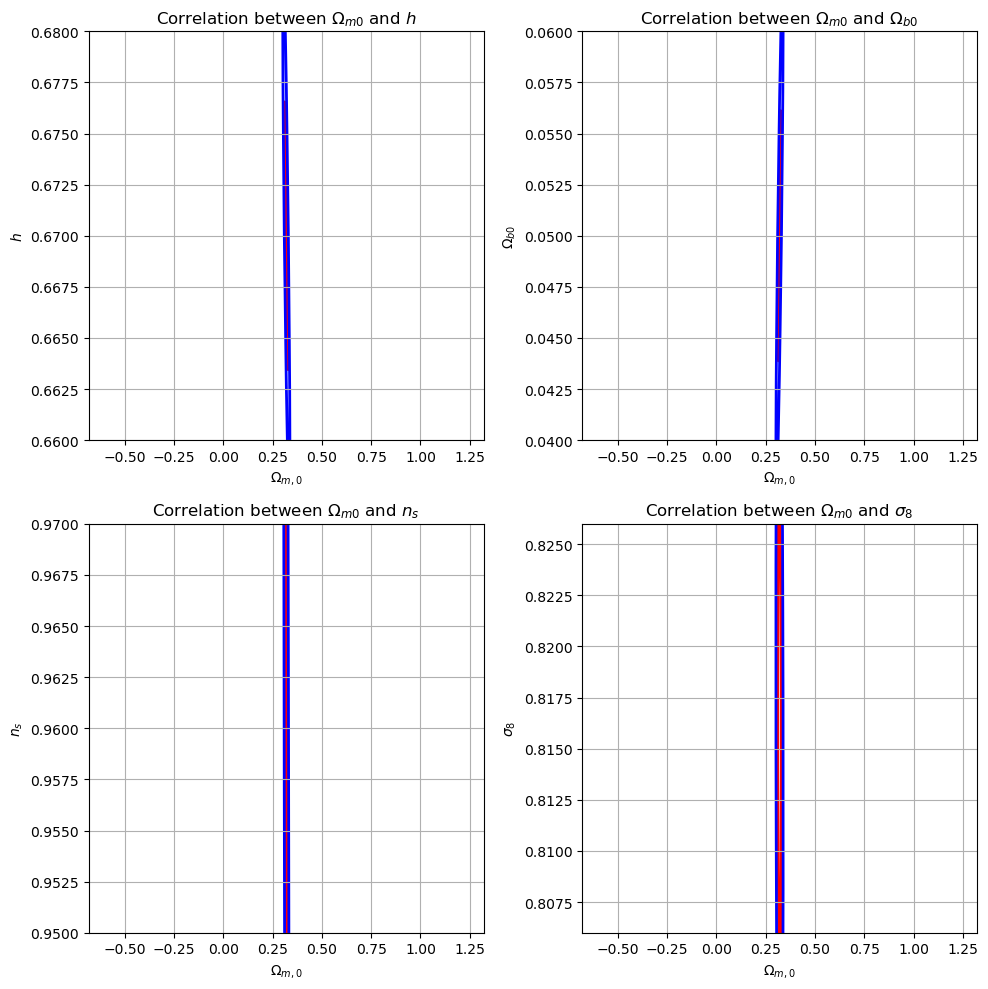

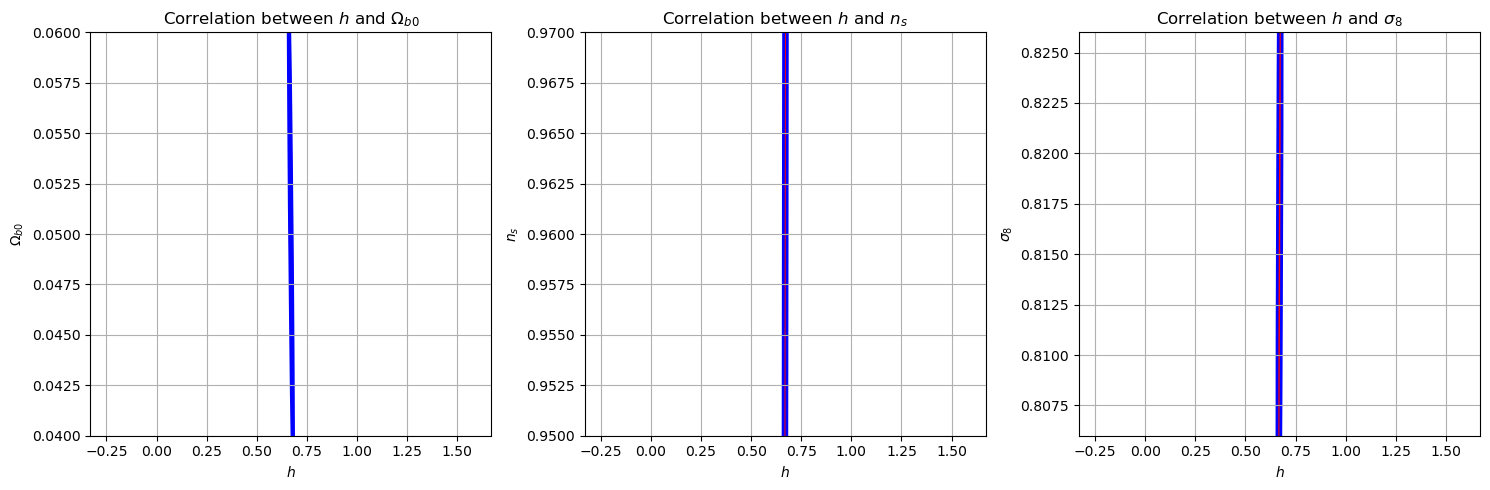

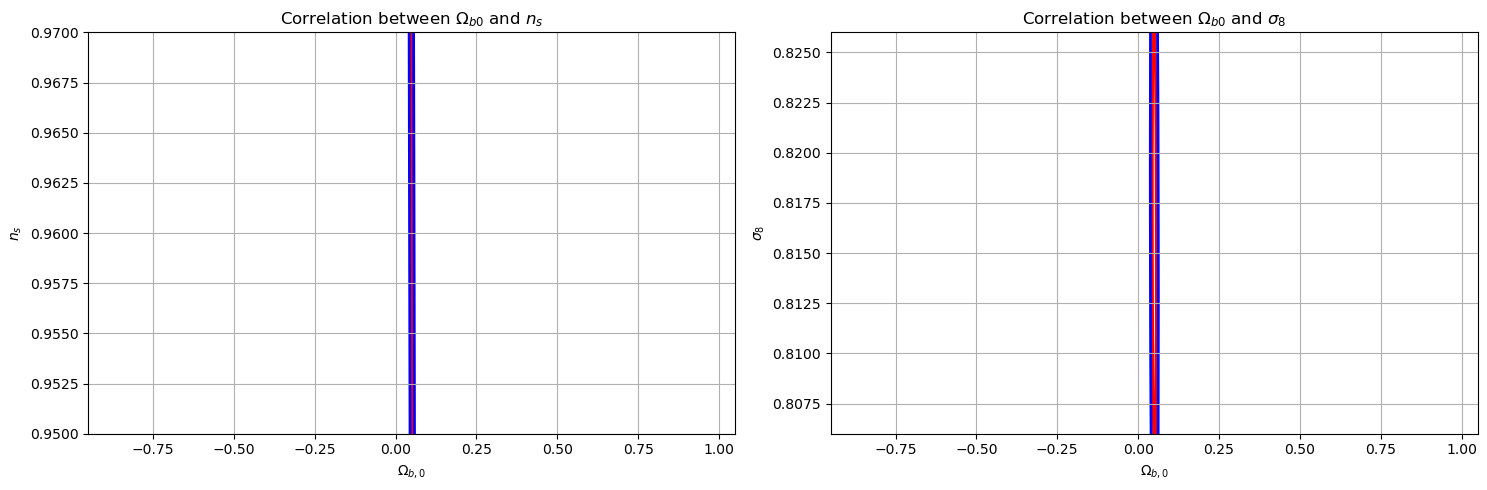

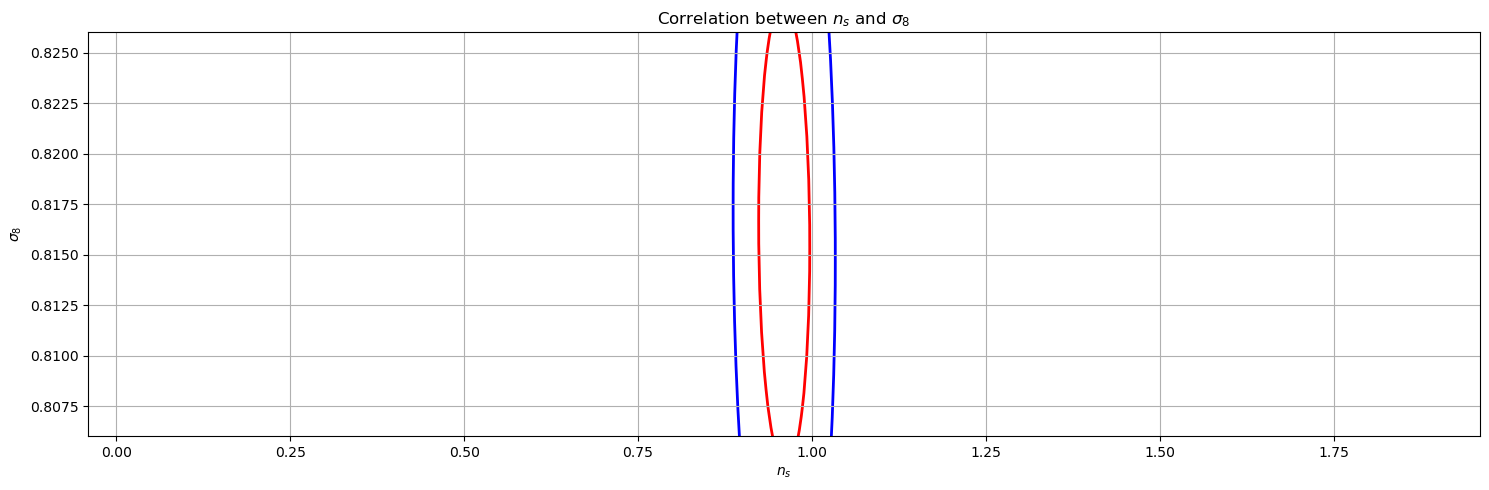

In [50]:
params = [Omega_m0, h, Omega_b0, ns, sigma8]
params_names = ['$\Omega_{m0}$', '$h$', '$\Omega_{b0}$', '$n_s$', '$\sigma_8$']

# Omega_m0
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
for i in range(1, 5):
    cov_ij = cov_matrix[np.ix_([0, i], [0, i])]
    row = (i - 1) // 2
    col = (i - 1) % 2
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(Omega_m0 - 1, Omega_m0 + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$\Omega_{m,0}$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[0]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# h
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(2, 5):
    cov_ij = cov_matrix[np.ix_([1, i], [1, i])]
    ax = axs[i - 2]
    plot_error_ellipse(ax, cov_ij, pos=(h, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(h, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(h - 1, h + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$h$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[1]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_b0
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(3, 5):
    cov_ij = cov_matrix[np.ix_([2, i], [2, i])]
    ax = axs[i - 3]
    plot_error_ellipse(ax, cov_ij, pos=(Omega_b0, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(Omega_b0, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(Omega_b0 - 1, Omega_b0 + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$\Omega_{b,0}$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[2]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# ns
fig, ax = plt.subplots(figsize=(15, 5))
cov_ij = cov_matrix[np.ix_([3, 4], [3, 4])]
plot_error_ellipse(ax, cov_ij, pos=(ns, params[4]), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(ns, params[4]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
ax.set_xlim(ns - 1, ns + 1)
ax.set_ylim(params[4] - 0.01, params[4] + 0.01)
ax.set_xlabel('$n_s$')
ax.set_ylabel(params_names[4])
ax.grid(True)
ax.set_title(f'Correlation between {params_names[3]} and {params_names[4]}')
plt.tight_layout()
plt.show()

# $\Lambda CDM$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega{DE,0}$

5. $n_s$

6. $\sigma_8$

In [5]:
Fi_S_NF = np.array([[ 1.11406234e+06,  3.62854836e+06,  1.27875905e+06,
        -6.32813815e+04, -1.17573770e+05,  8.18403171e+05],
       [ 3.62854836e+06,  1.25509271e+07,  4.62733238e+06,
        -2.35927486e+05, -5.17504585e+05,  2.73787037e+06],
       [ 1.27875905e+06,  4.62733238e+06,  1.85510373e+06,
        -7.80097400e+04, -2.18418680e+05,  9.75971742e+05],
       [-6.32813815e+04, -2.35927486e+05, -7.80097400e+04,
         7.44725641e+03,  1.27525608e+04, -5.04412772e+04],
       [-1.17573770e+05, -5.17504585e+05, -2.18418680e+05,
         1.27525608e+04,  8.46796553e+04, -6.02483433e+04],
       [ 8.18403171e+05,  2.73787037e+06,  9.75971742e+05,
        -5.04412772e+04, -6.02483433e+04,  6.48242195e+05]])

In [6]:
cov_matrix = inv(Fi_S_NF)

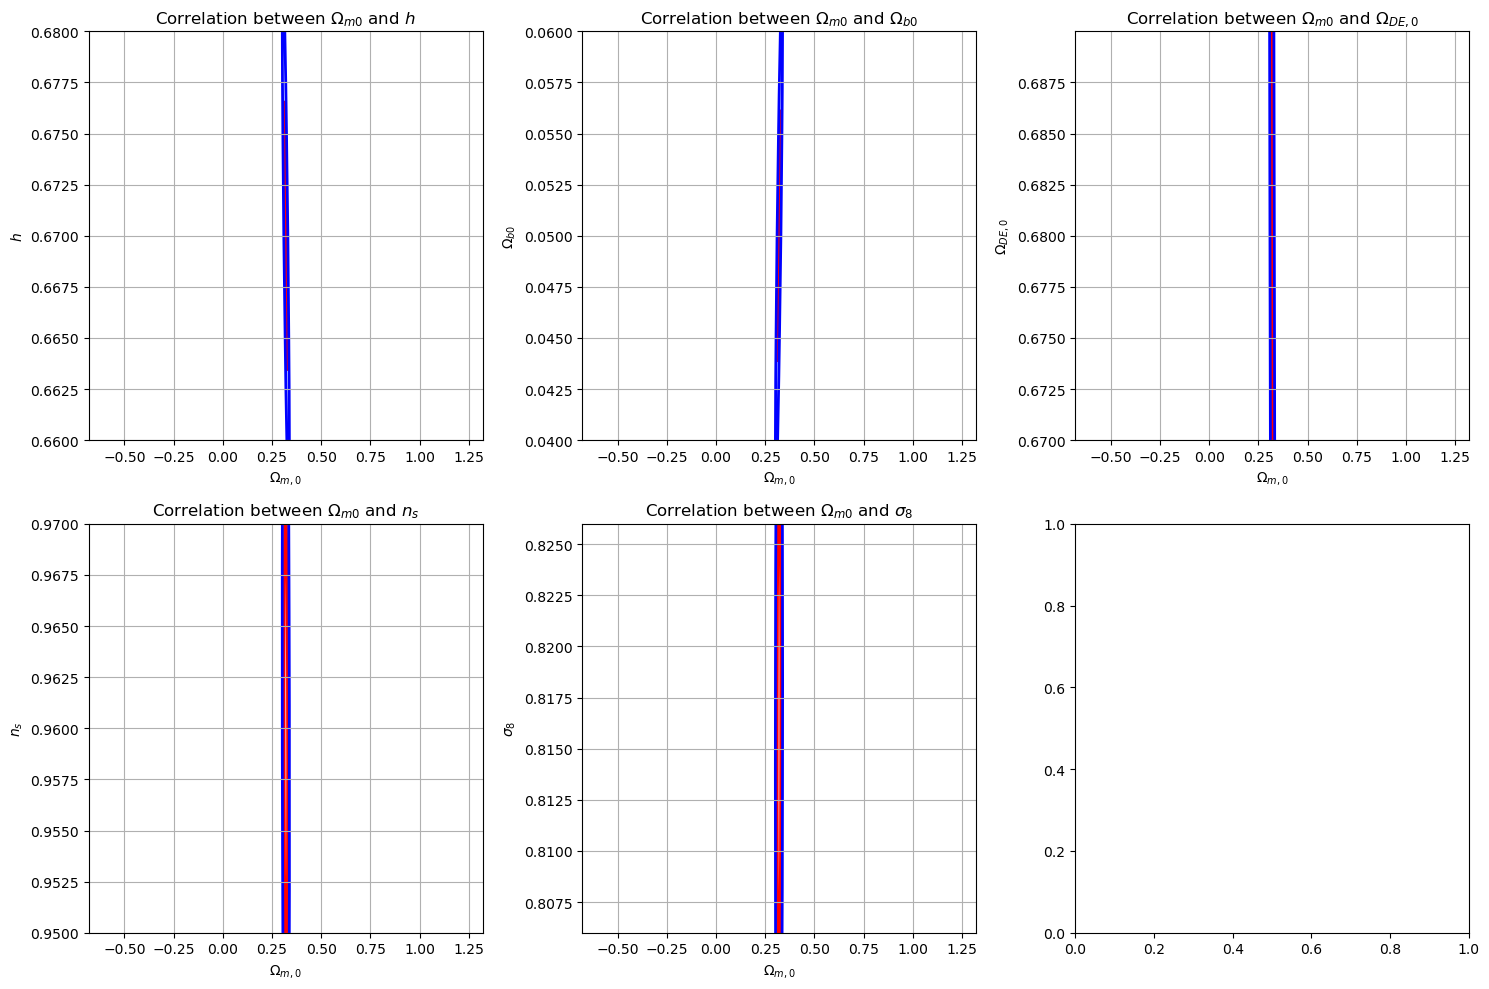

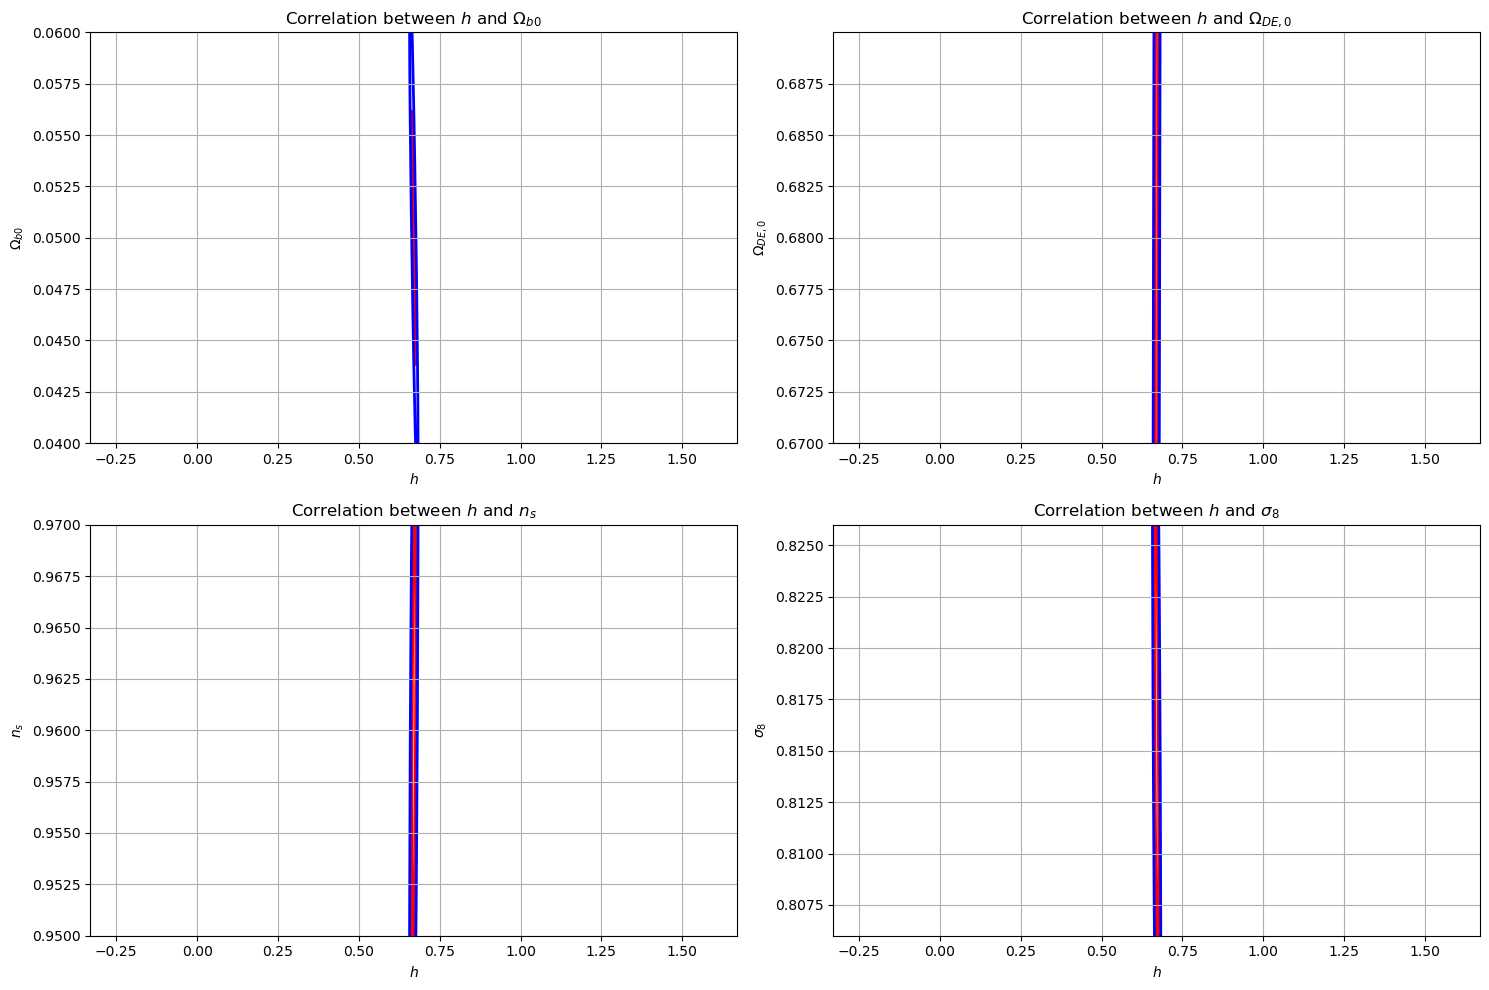

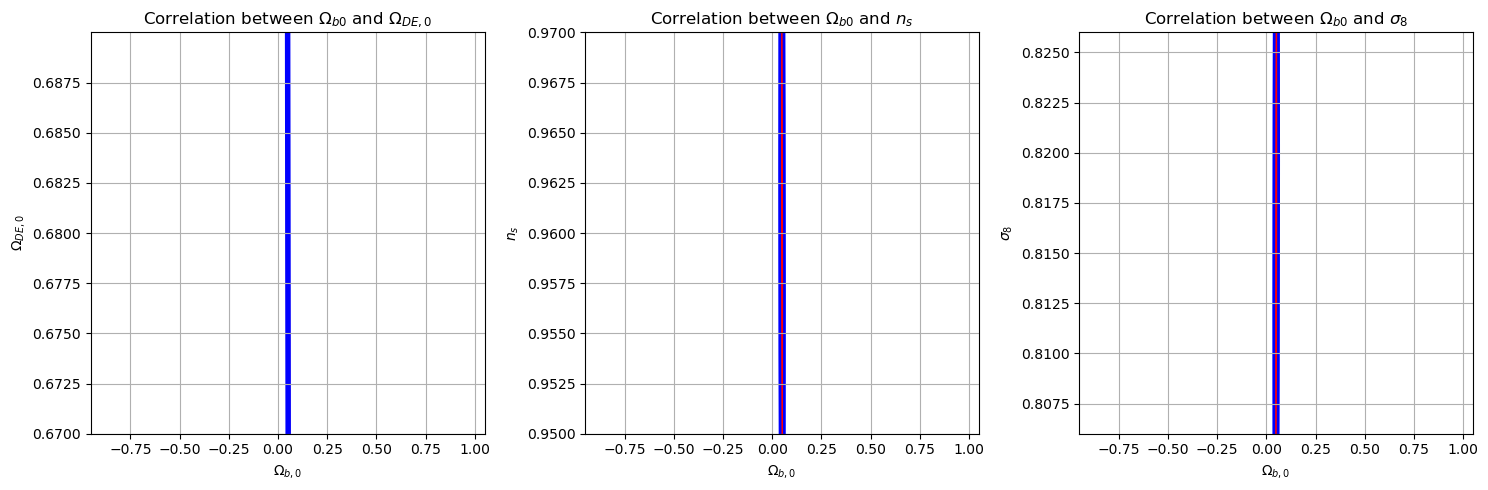

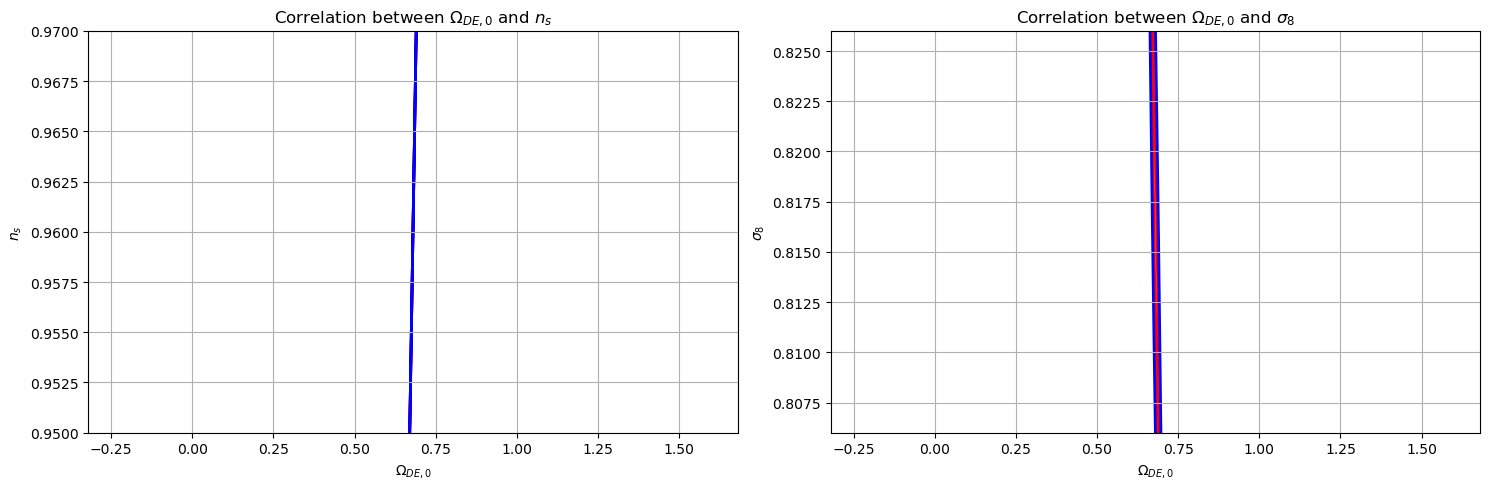

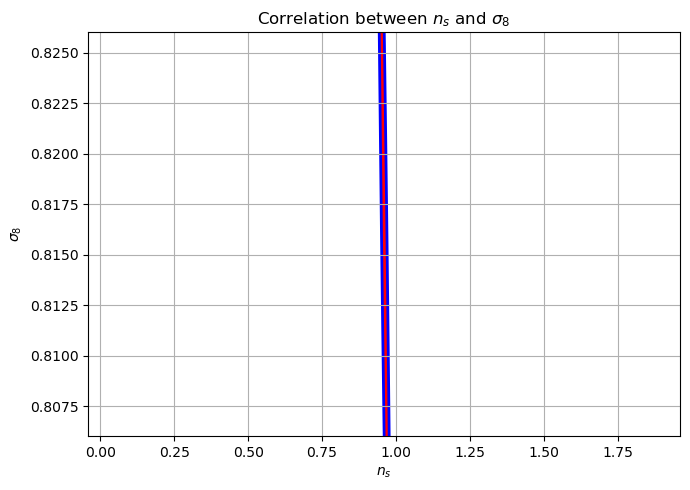

In [7]:
params = [Omega_m0, h, Omega_b0, Omega_DE0, ns, sigma8]
params_names = ['$\Omega_{m0}$', '$h$', '$\Omega_{b0}$', '$\Omega_{DE,0}$', '$n_s$', '$\sigma_8$']

# Omega_m0
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(1, 6):
    cov_ij = cov_matrix[np.ix_([0, i], [0, i])]
    row = (i - 1) // 3
    col = (i - 1) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(Omega_m0, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(Omega_m0 - 1, Omega_m0 + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$\Omega_{m,0}$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[0]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# h
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i in range(2, 6):
    cov_ij = cov_matrix[np.ix_([1, i], [1, i])]
    row = (i - 2) // 2
    col = (i - 2) % 2
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(h, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(h, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(h - 1, h + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$h$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[1]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_b0
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3, 6):
    cov_ij = cov_matrix[np.ix_([2, i], [2, i])]
    ax = axs[i - 3]
    plot_error_ellipse(ax, cov_ij, pos=(Omega_b0, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(Omega_b0, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(Omega_b0 - 1, Omega_b0 + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$\Omega_{b,0}$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[2]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_DE0
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(4, 6):
    cov_ij = cov_matrix[np.ix_([4, i], [4, i])]
    ax = axs[i - 4]
    plot_error_ellipse(ax, cov_ij, pos=(Omega_DE0, params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(Omega_DE0, params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(Omega_DE0 - 1, Omega_DE0 + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel('$\Omega_{DE,0}$')
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[3]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# ns
fig, ax = plt.subplots(figsize=(7, 5))
cov_ij = cov_matrix[np.ix_([4, 5], [4, 5])]
plot_error_ellipse(ax, cov_ij, pos=(ns, params[5]), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(ns, params[5]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
ax.set_xlim(ns - 1, ns + 1)
ax.set_ylim(params[5] - 0.01, params[5] + 0.01)
ax.set_xlabel('$n_s$')
ax.set_ylabel(params_names[5])
ax.grid(True)
ax.set_title(f'Correlation between {params_names[4]} and {params_names[5]}')
plt.tight_layout()
plt.show()


# $w_0$ and $w_a$ flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $w_0$

5. $w_a$

6. $n_s$

7. $\sigma_8$

## Figure of Merit (FoM)

Must be: 23

In [12]:
Fi_DE_F = np.array([[ 1.51452595e+06,  2.84506913e+06,  8.47833038e+05,
         9.95402818e+04,  2.25471929e+04, -1.43116217e+05,
         9.52490606e+05],
       [ 2.84506913e+06,  5.57079601e+06,  1.73597906e+06,
         2.02346489e+05,  4.61059863e+04, -3.40820827e+05,
         1.81878029e+06],
       [ 8.47833038e+05,  1.73597906e+06,  5.86663737e+05,
         6.43471517e+04,  1.55530295e+04, -1.29034061e+05,
         5.44551630e+05],
       [ 9.95402818e+04,  2.02346489e+05,  6.43471517e+04,
         7.77536492e+03,  1.74162419e+03, -1.43106729e+04,
         6.48305671e+04],
       [ 2.25471929e+04,  4.61059863e+04,  1.55530295e+04,
         1.74162419e+03,  4.21474265e+02, -3.46667779e+03,
         1.44322213e+04],
       [-1.43116217e+05, -3.40820827e+05, -1.29034061e+05,
        -1.43106729e+04, -3.46667779e+03,  8.42265987e+04,
        -5.85782257e+04],
       [ 9.52490606e+05,  1.81878029e+06,  5.44551630e+05,
         6.48305671e+04,  1.44322213e+04, -5.85782257e+04,
         6.44628567e+05]])

cov_matrix = inv(Fi_DE_F)

print(Fi_DE_F[3:5, 3:5])

F_wa_w0 = inv(cov_matrix[3:5, 3:5]) #Elements of the covariance matrix

determinant = np.linalg.det(F_wa_w0)

FoM = np.sqrt(determinant)

print('Figure of merit: ' + str(FoM))

[[7775.36492  1741.62419 ]
 [1741.62419   421.474265]]
Figure of merit: 8.233633434973491


### Correlation matrix

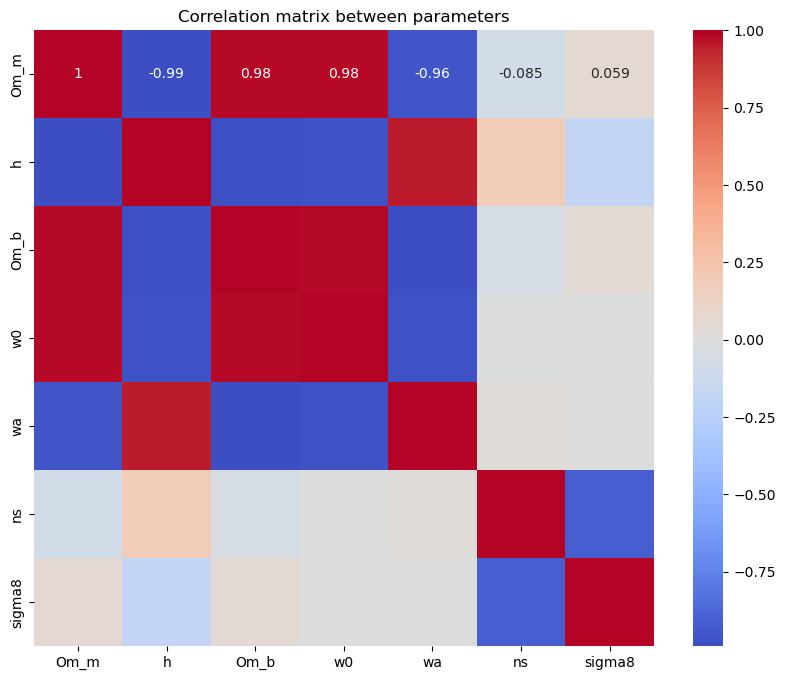

In [56]:
import seaborn as sns

cov_matrix = inv(Fi_DE_F)
diag = np.sqrt(np.diag(cov_matrix))
corr_matrix = cov_matrix / np.outer(diag, diag)

param_labels = ['Om_m', 'h', 'Om_b', 'w0', 'wa', 'ns', 'sigma8']

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, xticklabels=param_labels, yticklabels=param_labels, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix between parameters')
plt.show()

### Confidence regions

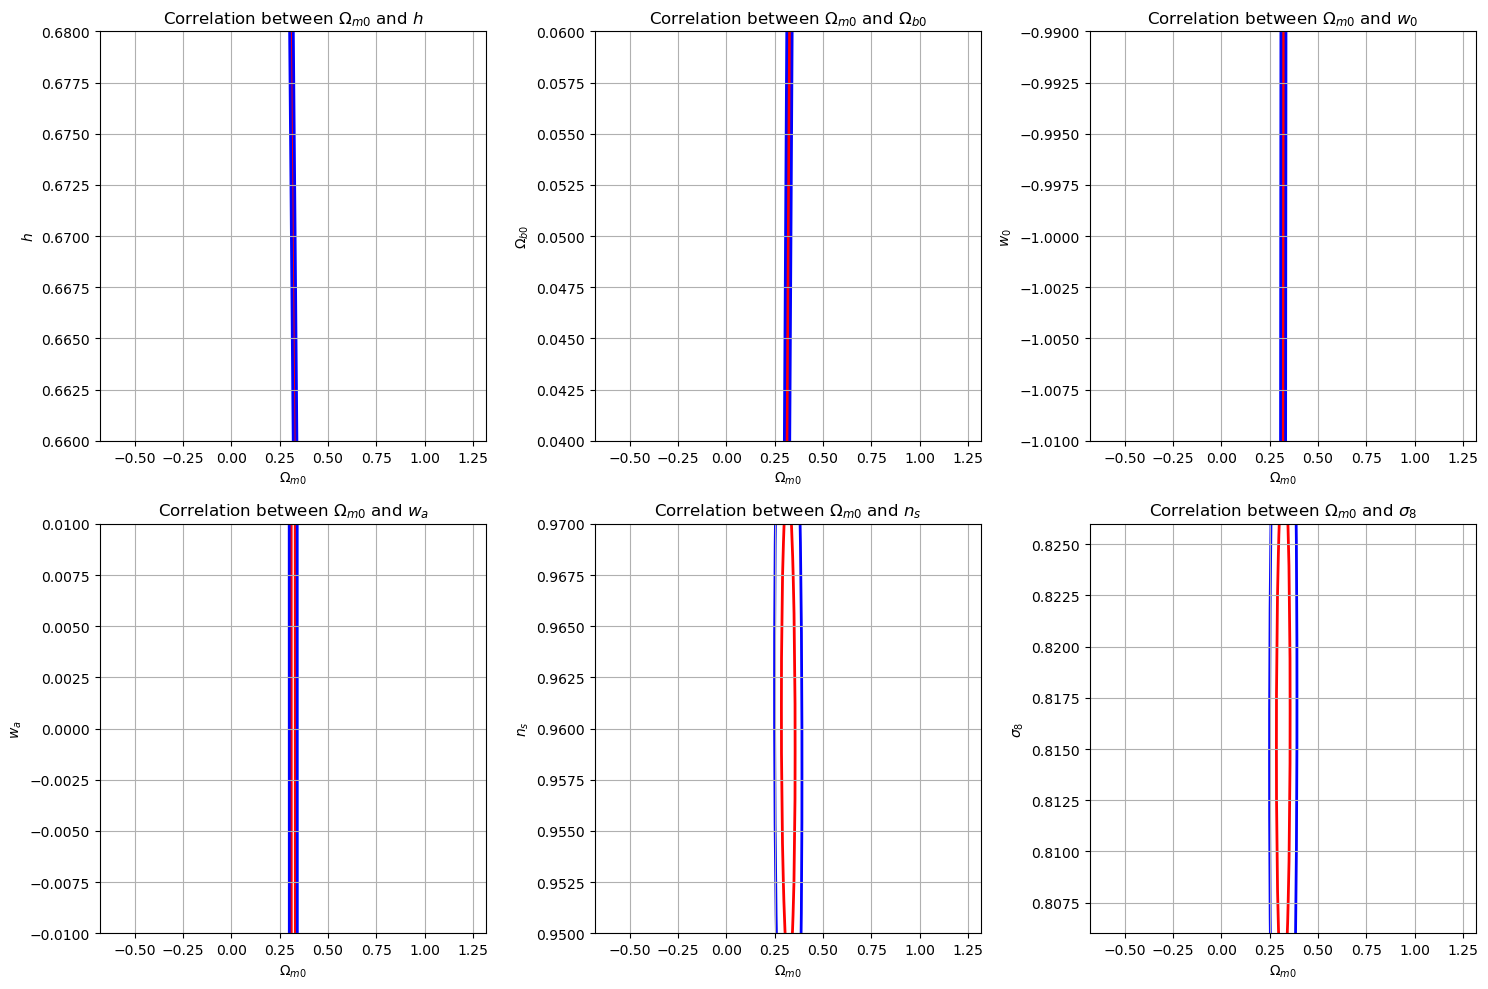

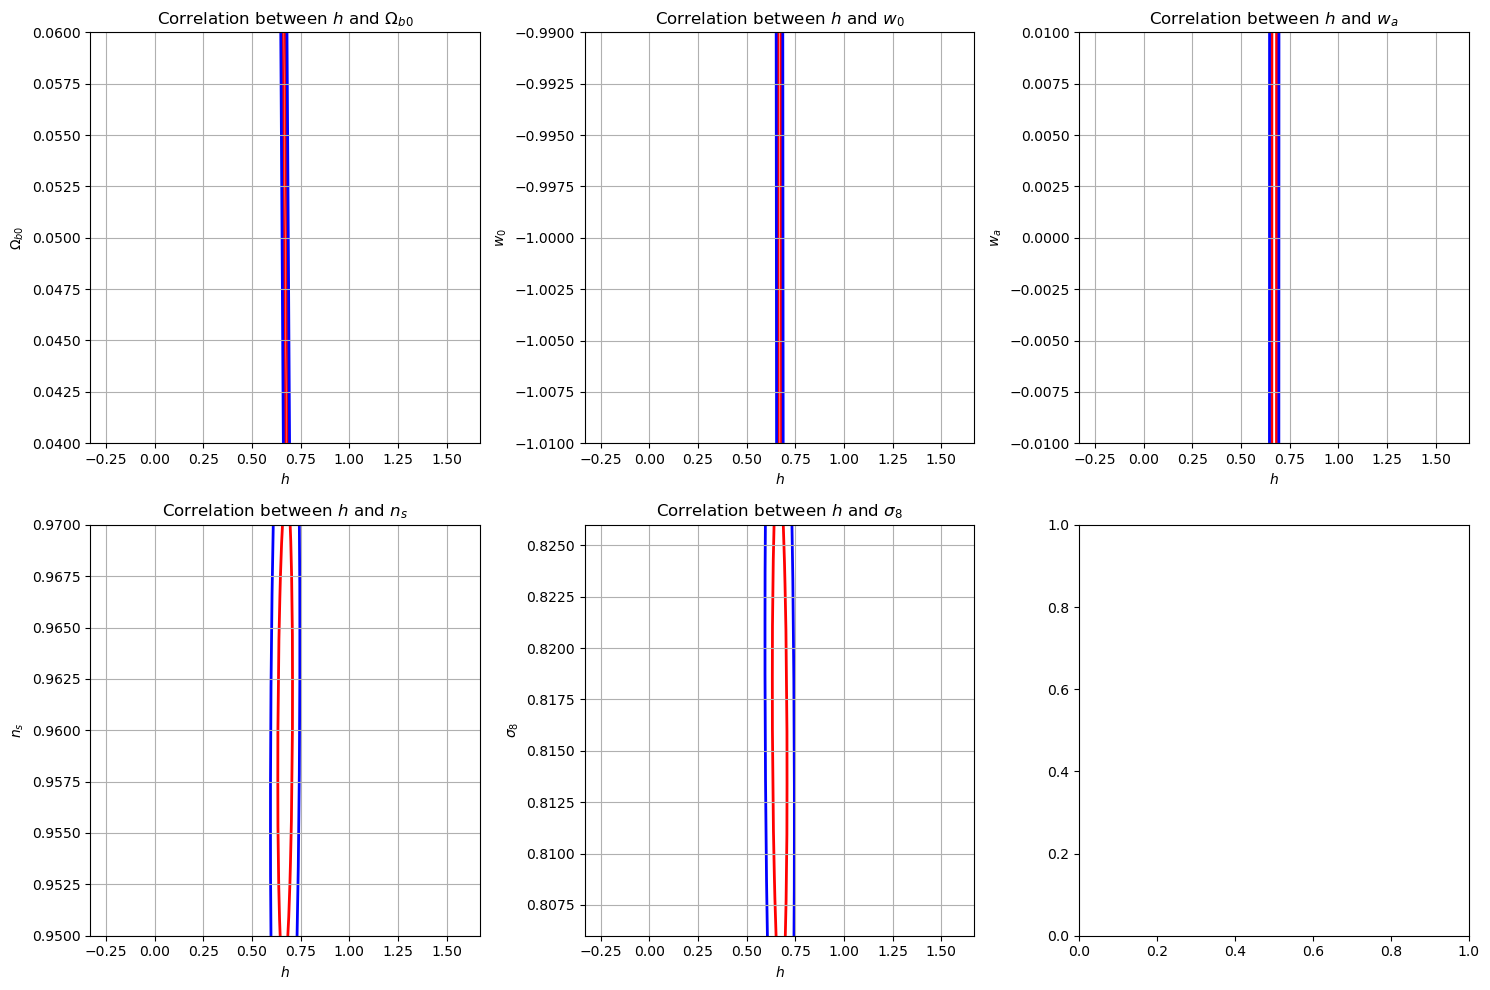

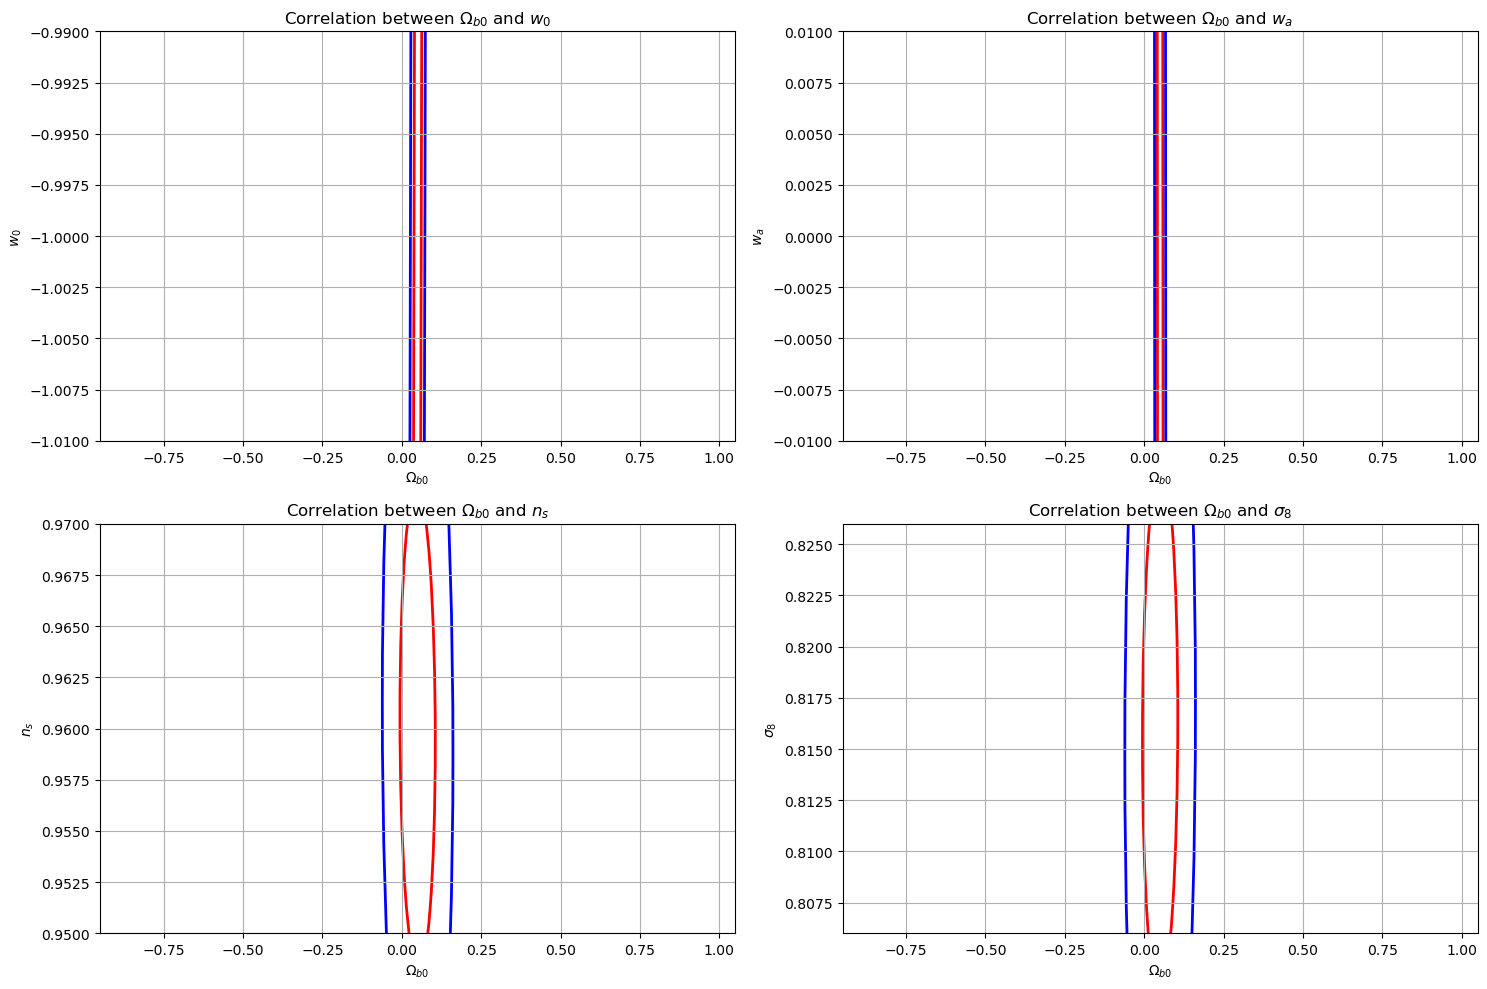

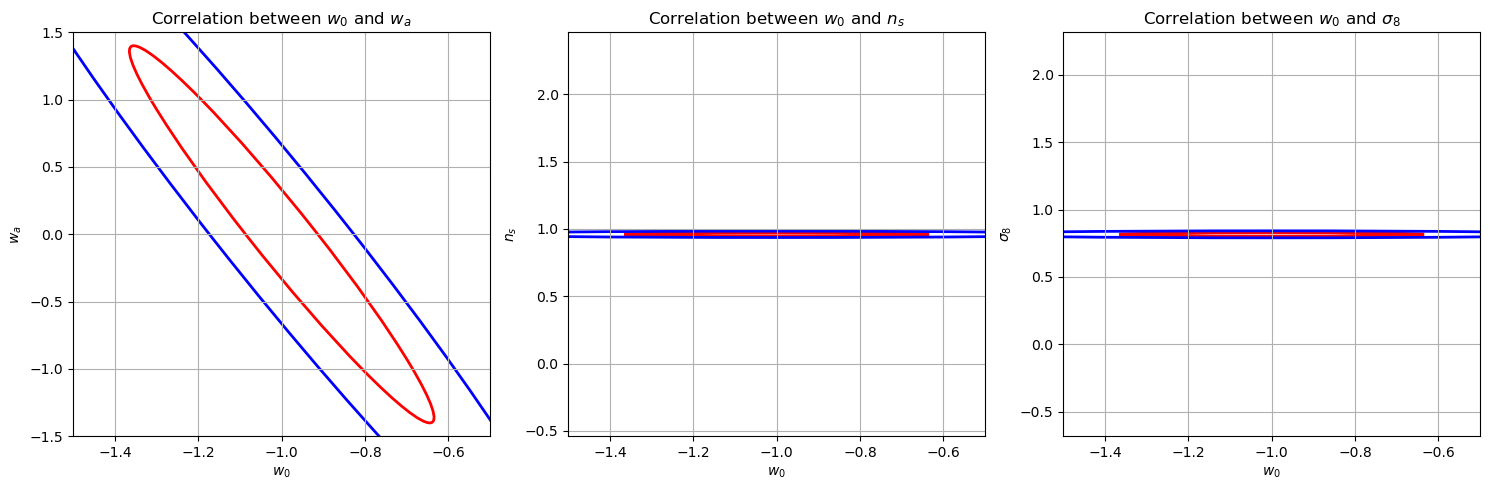

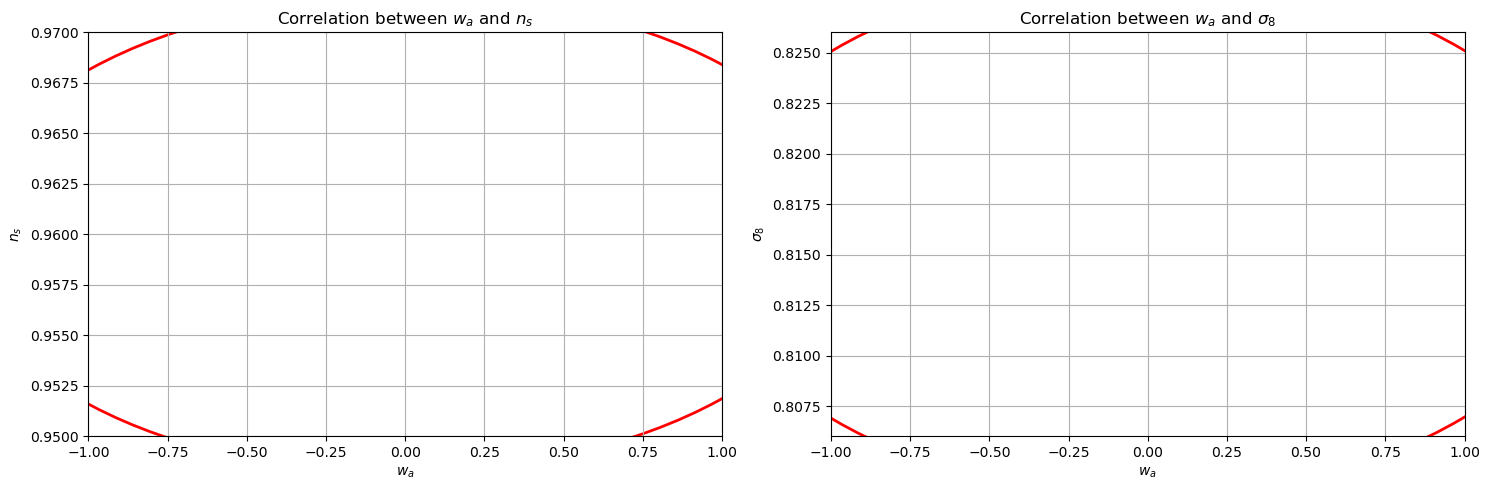

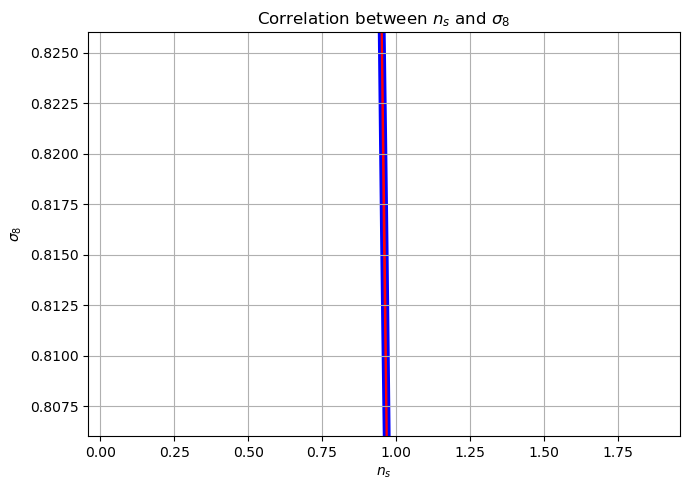

In [64]:
params = [Omega_m0, h, Omega_b0, w0, wa, ns, sigma8]
params_names = ['$\Omega_{m0}$', '$h$', '$\Omega_{b0}$', '$w_0$', '$w_a$', '$n_s$', '$\sigma_8$']

# Omega_m0
j = 0
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(1, 7):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 1) // 3
    col = (i - 1) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# h
j = 1
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2, 7):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 2) // 3
    col = (i - 2) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_b0
j = 2
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
for i in range(3, 7):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 3) // 2
    col = (i - 3) % 2
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# w0
j = 3
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(4, 7):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 4]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 0.5, params[j] + 0.5)
    ax.set_ylim(params[i] - 1.5, params[i] + 1.5)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# wa
j = 4
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(5, 7):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 5]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# ns
j = 5
fig, ax = plt.subplots(figsize=(7, 5))
cov_ij = cov_matrix[np.ix_([j, 6], [j, 6])]
plot_error_ellipse(ax, cov_ij, pos=(params[j], params[6]), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(params[j], params[6]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
ax.set_xlim(params[j] - 1, params[j] + 1)
ax.set_ylim(params[6] - 0.01, params[6] + 0.01)
ax.set_xlabel(params_names[j])
ax.set_ylabel(params_names[6])
ax.grid(True)
ax.set_title(f'Correlation between {params_names[j]} and {params_names[6]}')
plt.tight_layout()
plt.show()


# $w_0$ and $w_a$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

In [81]:
Fi_DE_NF = np.array([[ 1.51452595e+06,  2.84506913e+06,  8.47833038e+05,
        -1.92989305e+05,  9.95402818e+04,  2.25471929e+04,
        -1.43116217e+05,  9.52490606e+05],
       [ 2.84506913e+06,  5.57079601e+06,  1.73597906e+06,
        -3.94190971e+05,  2.02346489e+05,  4.61059863e+04,
        -3.40820827e+05,  1.81878029e+06],
       [ 8.47833038e+05,  1.73597906e+06,  5.86663737e+05,
        -1.31587341e+05,  6.43471517e+04,  1.55530295e+04,
        -1.29034061e+05,  5.44551630e+05],
       [-1.92989305e+05, -3.94190971e+05, -1.31587341e+05,
         2.98242740e+04, -1.48224304e+04, -3.53465215e+03,
         2.91533757e+04, -1.24071762e+05],
       [ 9.95402818e+04,  2.02346489e+05,  6.43471517e+04,
        -1.48224304e+04,  7.77536492e+03,  1.74162419e+03,
        -1.43106729e+04,  6.48305671e+04],
       [ 2.25471929e+04,  4.61059863e+04,  1.55530295e+04,
        -3.53465215e+03,  1.74162419e+03,  4.21474265e+02,
        -3.46667779e+03,  1.44322213e+04],
       [-1.43116217e+05, -3.40820827e+05, -1.29034061e+05,
         2.91533757e+04, -1.43106729e+04, -3.46667779e+03,
         8.42265987e+04, -5.85782257e+04],
       [ 9.52490606e+05,  1.81878029e+06,  5.44551630e+05,
        -1.24071762e+05,  6.48305671e+04,  1.44322213e+04,
        -5.85782257e+04,  6.44628567e+05]])

cov_matrix = inv(Fi_DE_NF)

print(cov_matrix)

[[ 1.25740415e-03 -1.32523820e-03  1.82358354e-03 -1.28762669e-03
   1.23153164e-02 -5.22935161e-02 -3.10070908e-05  2.22520102e-05]
 [-1.32523820e-03  1.42339397e-03 -1.96128020e-03  1.04739042e-03
  -1.30979220e-02  5.39729786e-02  7.87345908e-05 -8.34374950e-05]
 [ 1.82358354e-03 -1.96128020e-03  1.30679560e-02  1.18797314e-01
   5.85445629e-02  3.69528125e-01 -4.59148077e-04  4.62160677e-04]
 [-1.28762669e-03  1.04739042e-03  1.18797314e-01  1.41456248e+00
   4.60167637e-01  5.31573633e+00 -5.05049331e-03  5.10496525e-03]
 [ 1.23153164e-02 -1.30979220e-02  5.85445629e-02  4.60167637e-01
   2.83400496e-01  1.23183077e+00 -1.67068064e-03  1.63870645e-03]
 [-5.22935161e-02  5.39729786e-02  3.69528125e-01  5.31573633e+00
   1.23183077e+00  2.19366789e+01 -1.87177661e-02  1.92327460e-02]
 [-3.10070908e-05  7.87345908e-05 -4.59148077e-04 -5.05049331e-03
  -1.67068064e-03 -1.87177661e-02  1.57566563e-04 -1.59131395e-04]
 [ 2.22520102e-05 -8.34374950e-05  4.62160677e-04  5.10496525e-03
   

### FoM

Must be: 5

In [82]:
F_wa_w0 = inv(np.array([[1.75412366e+00, 1.14623866e+01], [1.14623866e+01, 9.52249334e+01]]))

determinant = np.linalg.det(F_wa_w0)

FoM = np.sqrt(determinant)

print(FoM)

0.16748280271971833


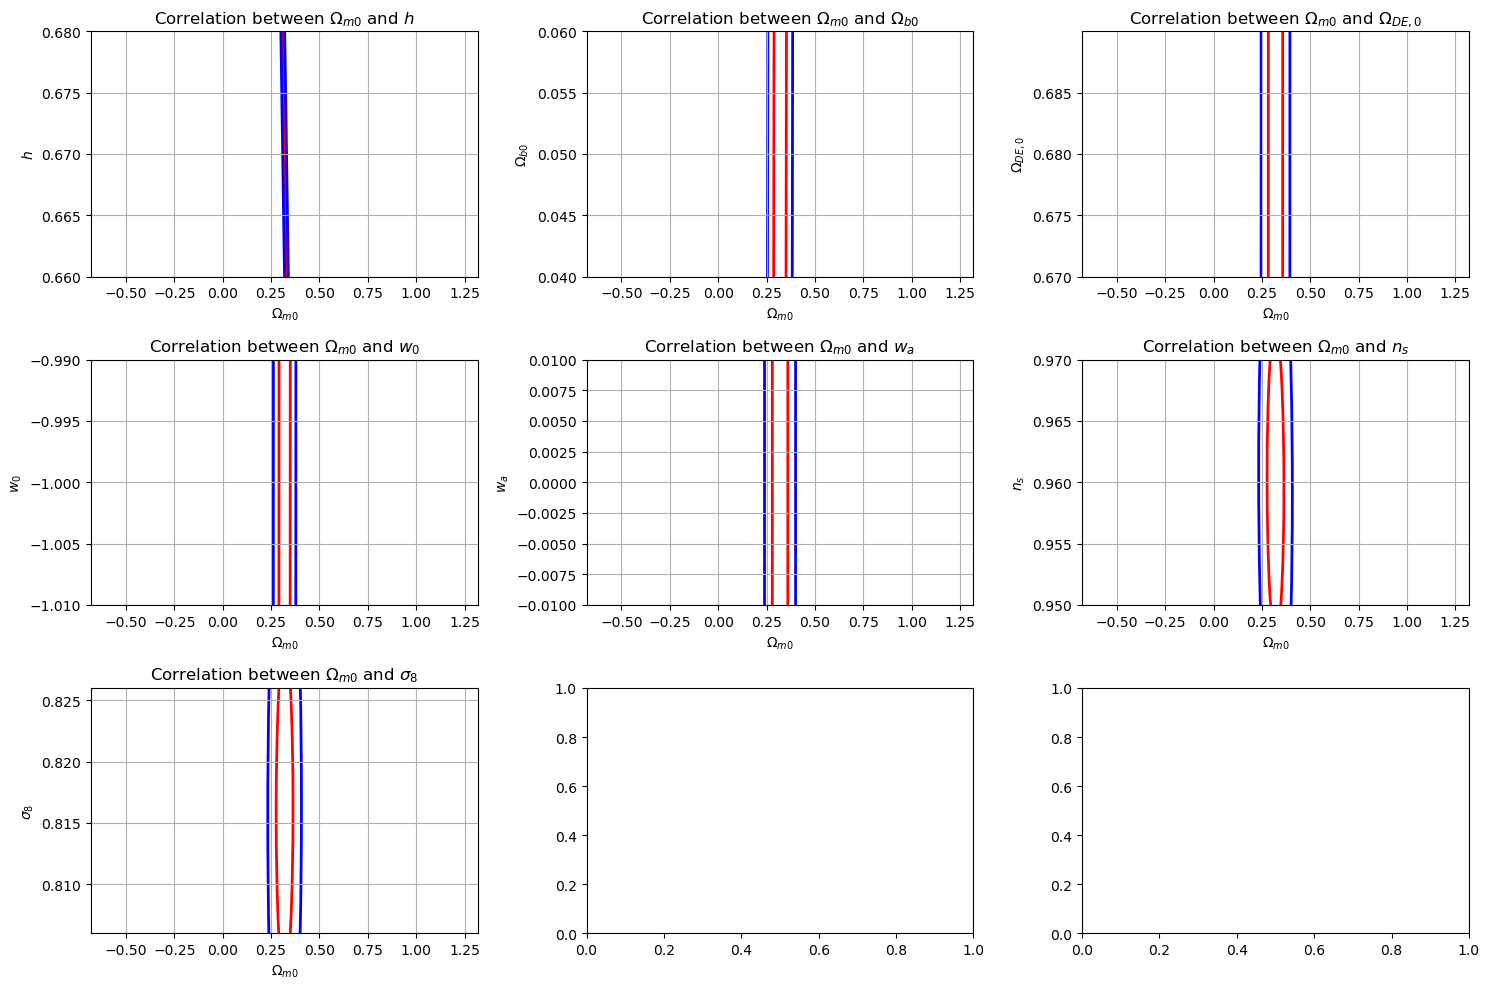

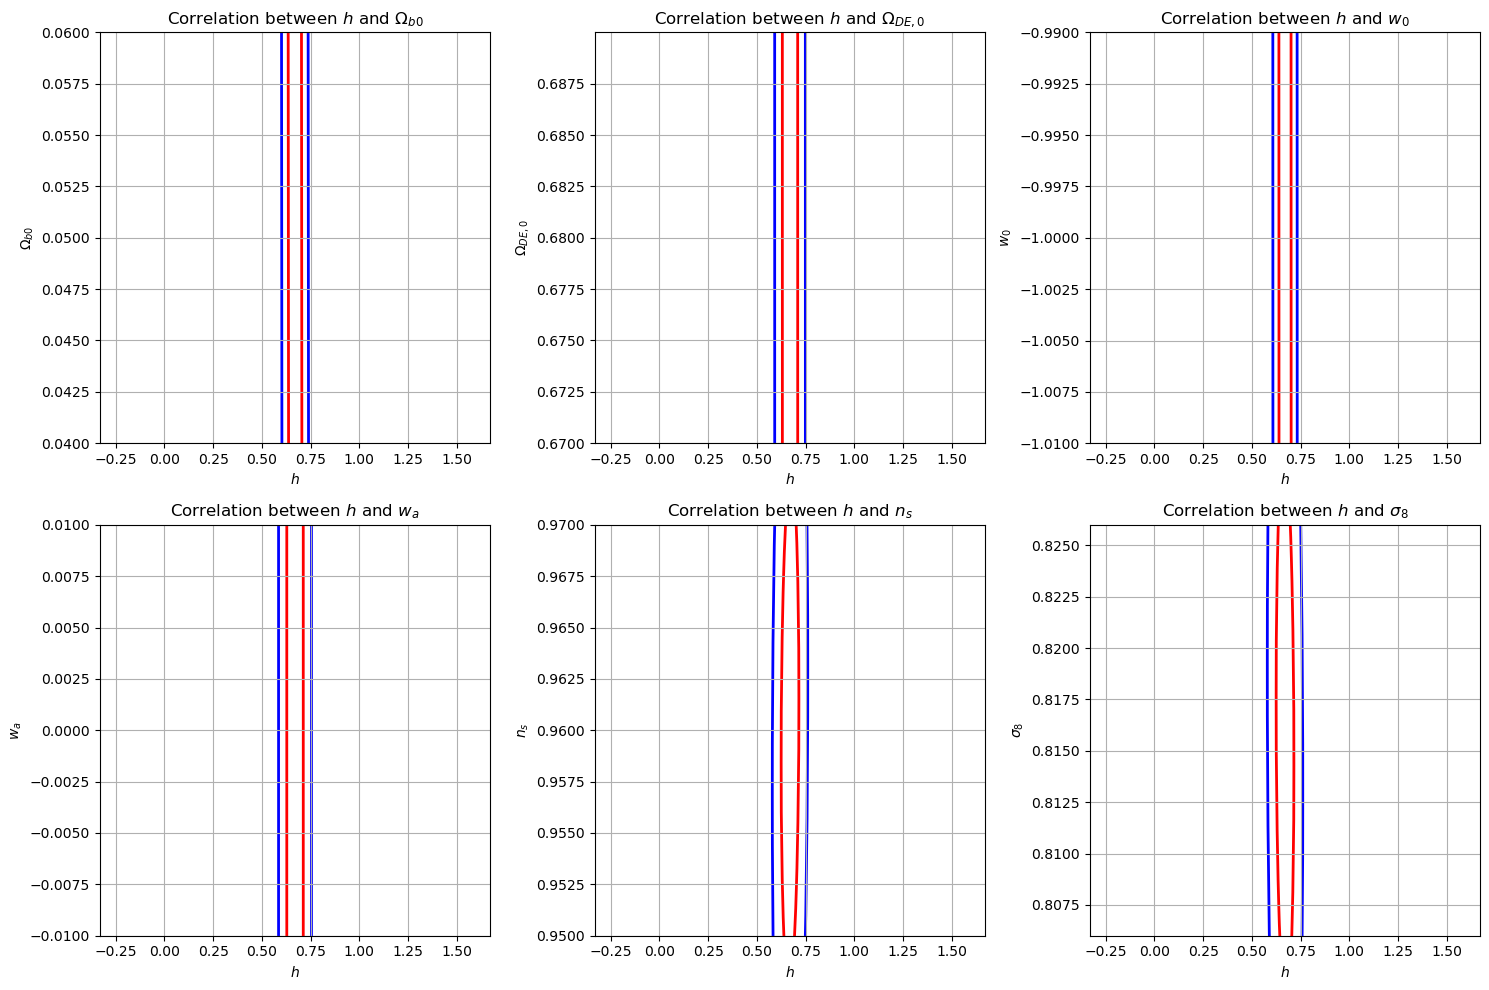

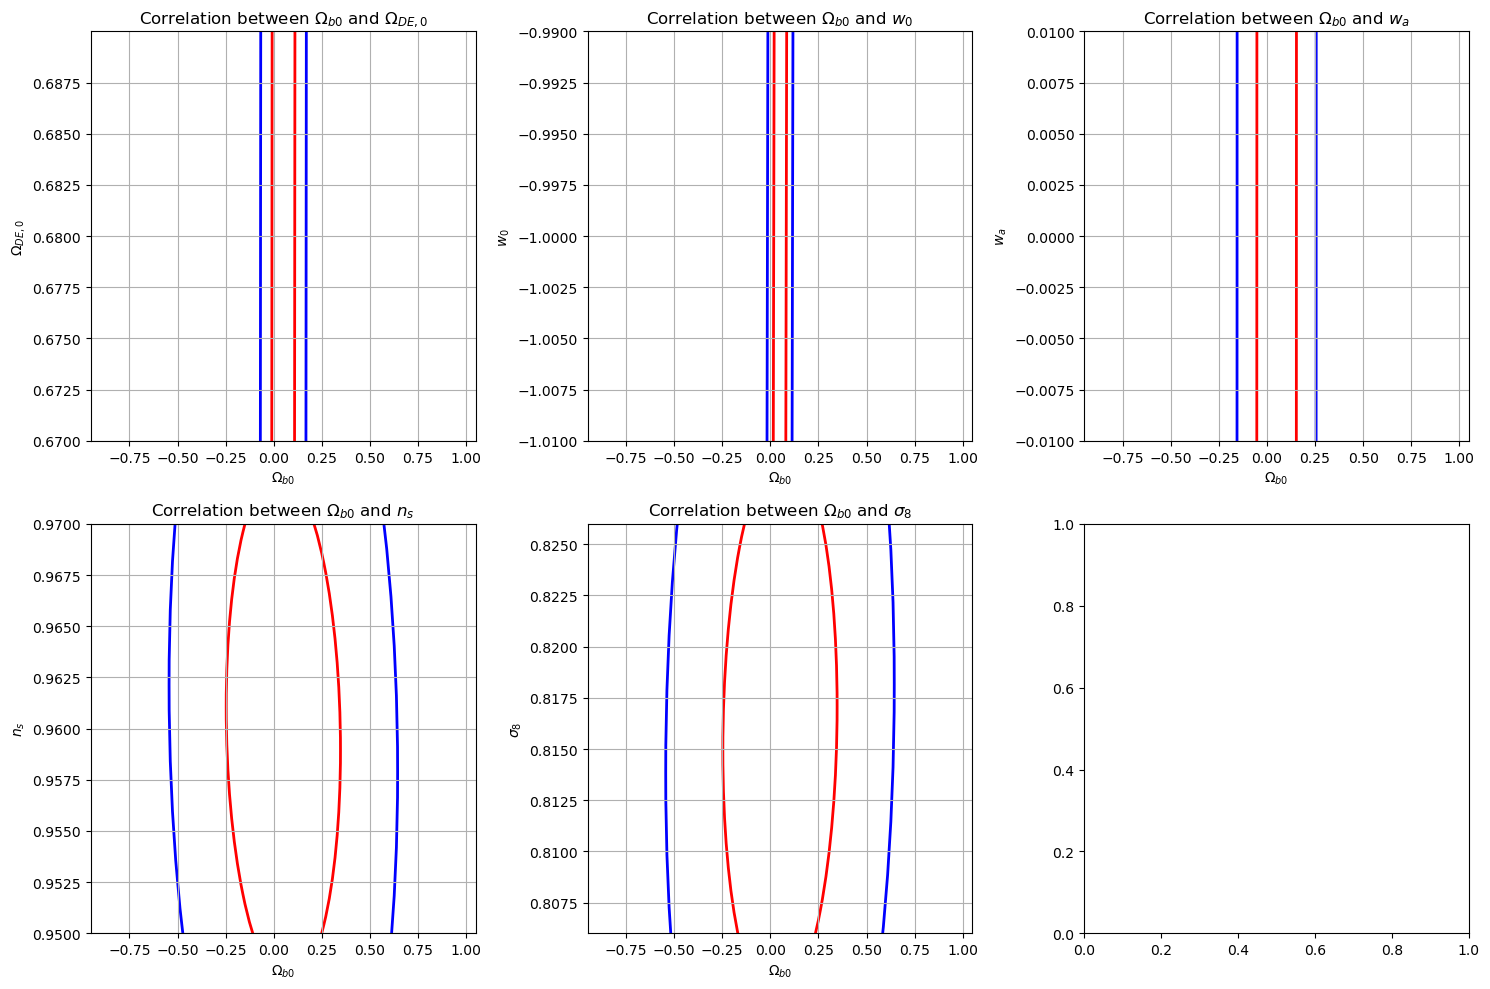

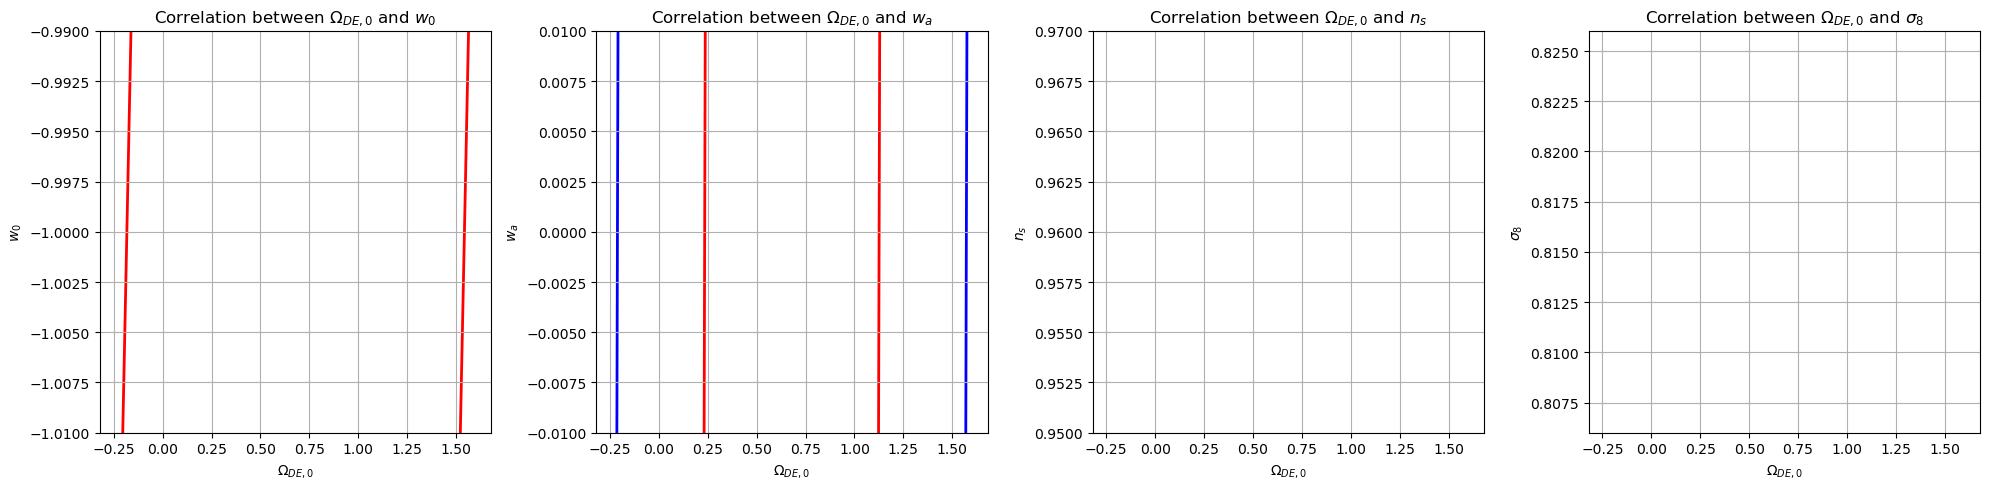

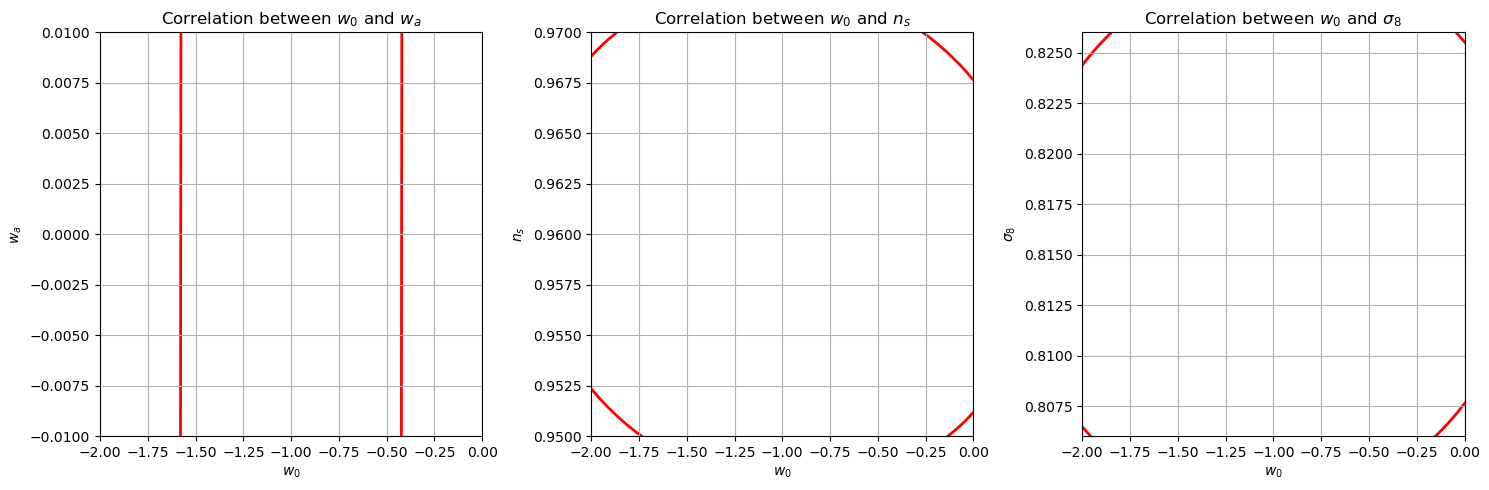

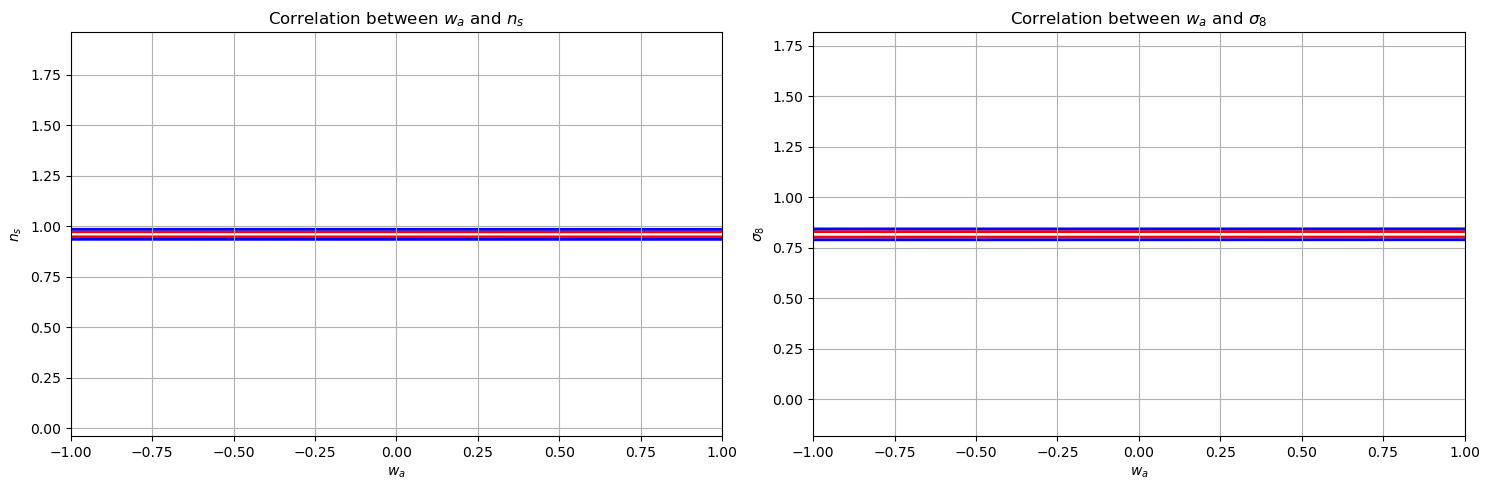

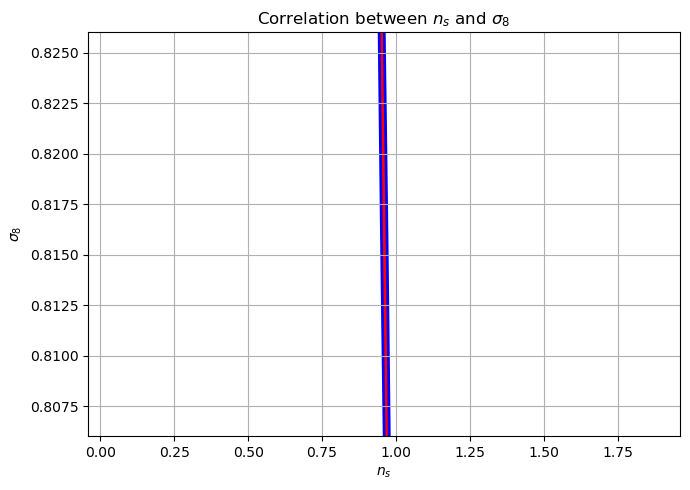

In [125]:
params = [Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8]
params_names = ['$\Omega_{m0}$', '$h$', '$\Omega_{b0}$', '$\Omega_{DE,0}$', '$w_0$', '$w_a$', '$n_s$', '$\sigma_8$']

# Omega_m0
j = 0
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i in range(1, 8):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 1) // 3
    col = (i - 1) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# h
j = 1
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(2, 8):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 2) // 3
    col = (i - 2) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_b0
j = 2
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(3, 8):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 3) // 3
    col = (i - 3) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_DE0
j = 3
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i in range(4, 8):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 4]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# w0
j = 4
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(5, 8):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 5]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# wa
j = 5
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(6, 8):
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 6]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 1, params[i] + 1)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# ns
j = 6
fig, ax = plt.subplots(figsize=(7, 5))
cov_ij = cov_matrix[np.ix_([j, 7], [j, 7])]
plot_error_ellipse(ax, cov_ij, pos=(params[j], params[7]), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(params[j], params[7]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
ax.set_xlim(params[j] - 1, params[j] + 1)
ax.set_ylim(params[7] - 0.01, params[7] + 0.01)
ax.set_xlabel(params_names[j])
ax.set_ylabel(params_names[7])
ax.grid(True)
ax.set_title(f'Correlation between {params_names[j]} and {params_names[7]}')
plt.tight_layout()
plt.show()


# $w_0$, $w_a$ and $\gamma$ non-flat

Parameters:

1. $\Omega_{m,0}$

2. $h$

3. $\Omega_{b,0}$

4. $\Omega_{DE,0}$

5. $w_0$

6. $w_a$

7. $n_s$

8. $\sigma_8$

9. $\gamma$

In [140]:
F_DE_gamma_NF = np.array([[ 1.51452595e+06,  2.84506913e+06,  8.47833038e+05,
        -1.92989305e+05,  9.95402818e+04,  2.25471929e+04,
        -1.43116217e+05,  9.52490606e+05,  6.71038591e+01],
       [ 2.84506913e+06,  5.57079601e+06,  1.73597906e+06,
        -3.94190971e+05,  2.02346489e+05,  4.61059863e+04,
        -3.40820827e+05,  1.81878029e+06, -1.35936062e+02],
       [ 8.47833038e+05,  1.73597906e+06,  5.86663737e+05,
        -1.31587341e+05,  6.43471517e+04,  1.55530295e+04,
        -1.29034061e+05,  5.44551630e+05, -1.12003218e+02],
       [-1.92989305e+05, -3.94190971e+05, -1.31587341e+05,
         2.98242740e+04, -1.48224304e+04, -3.53465215e+03,
         2.91533757e+04, -1.24071762e+05,  2.12848355e+01],
       [ 9.95402818e+04,  2.02346489e+05,  6.43471517e+04,
        -1.48224304e+04,  7.77536492e+03,  1.74162419e+03,
        -1.43106729e+04,  6.48305671e+04, -1.43499674e+01],
       [ 2.25471929e+04,  4.61059863e+04,  1.55530295e+04,
        -3.53465215e+03,  1.74162419e+03,  4.21474265e+02,
        -3.46667779e+03,  1.44322213e+04, -2.32010132e+00],
       [-1.43116217e+05, -3.40820827e+05, -1.29034061e+05,
         2.91533757e+04, -1.43106729e+04, -3.46667779e+03,
         8.42265987e+04, -5.85782257e+04,  8.83466475e-01],
       [ 9.52490606e+05,  1.81878029e+06,  5.44551630e+05,
        -1.24071762e+05,  6.48305671e+04,  1.44322213e+04,
        -5.85782257e+04,  6.44628567e+05, -5.30616691e+00],
       [ 6.71038591e+01, -1.35936062e+02, -1.12003218e+02,
         2.12848355e+01, -1.43499674e+01, -2.32010132e+00,
         8.83466475e-01, -5.30616691e+00,  6.53551387e+00]])

In [141]:
cov_matrix = inv(F_DE_gamma_NF)

print(cov_matrix)

[[ 1.89409574e-03 -1.96515661e-03  8.74292791e-03  6.59304198e-02
   4.29413582e-02  1.66186992e-01 -1.77665289e-05  9.23884973e-06
   2.80809759e-02]
 [-1.96515661e-03  2.06655556e-03 -8.91569253e-03 -6.65113242e-02
  -4.38791799e-02 -1.65614812e-01  6.54269243e-05 -7.03583825e-05
  -2.82232932e-02]
 [ 8.74292791e-03 -8.91569253e-03  8.82650019e-02  8.49299838e-01
   3.91377813e-01  2.74389886e+00 -3.15254222e-04  3.20738141e-04
   3.05174351e-01]
 [ 6.59304198e-02 -6.65113242e-02  8.49299838e-01  8.51103722e+00
   3.69347988e+00  2.83815868e+01 -3.65263487e-03  3.73111448e-03
   2.96461957e+00]
 [ 4.29413582e-02 -4.38791799e-02  3.91377813e-01  3.69347988e+00
   1.75656970e+00  1.17411469e+01 -1.03378515e-03  1.01274939e-03
   1.35074683e+00]
 [ 1.66186992e-01 -1.65614812e-01  2.74389886e+00  2.83815868e+01
   1.17411469e+01  9.69081931e+01 -1.41742717e-02  1.47672843e-02
   9.63597760e+00]
 [-1.77665289e-05  6.54269243e-05 -3.15254222e-04 -3.65263487e-03
  -1.03378515e-03 -1.4174271

### Confidence regions

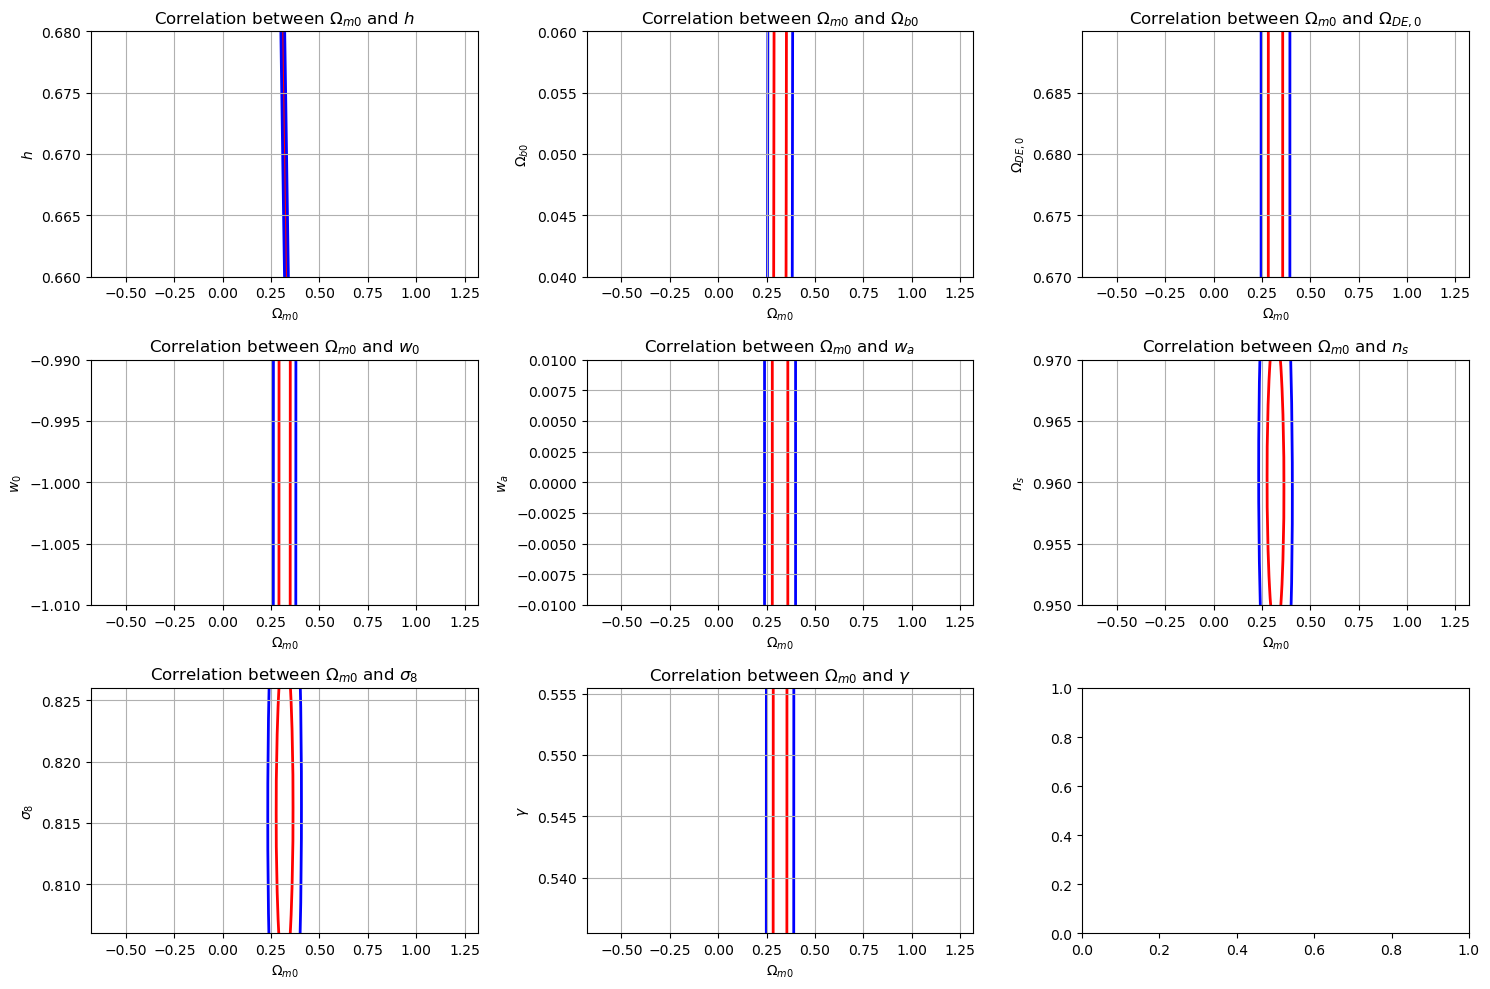

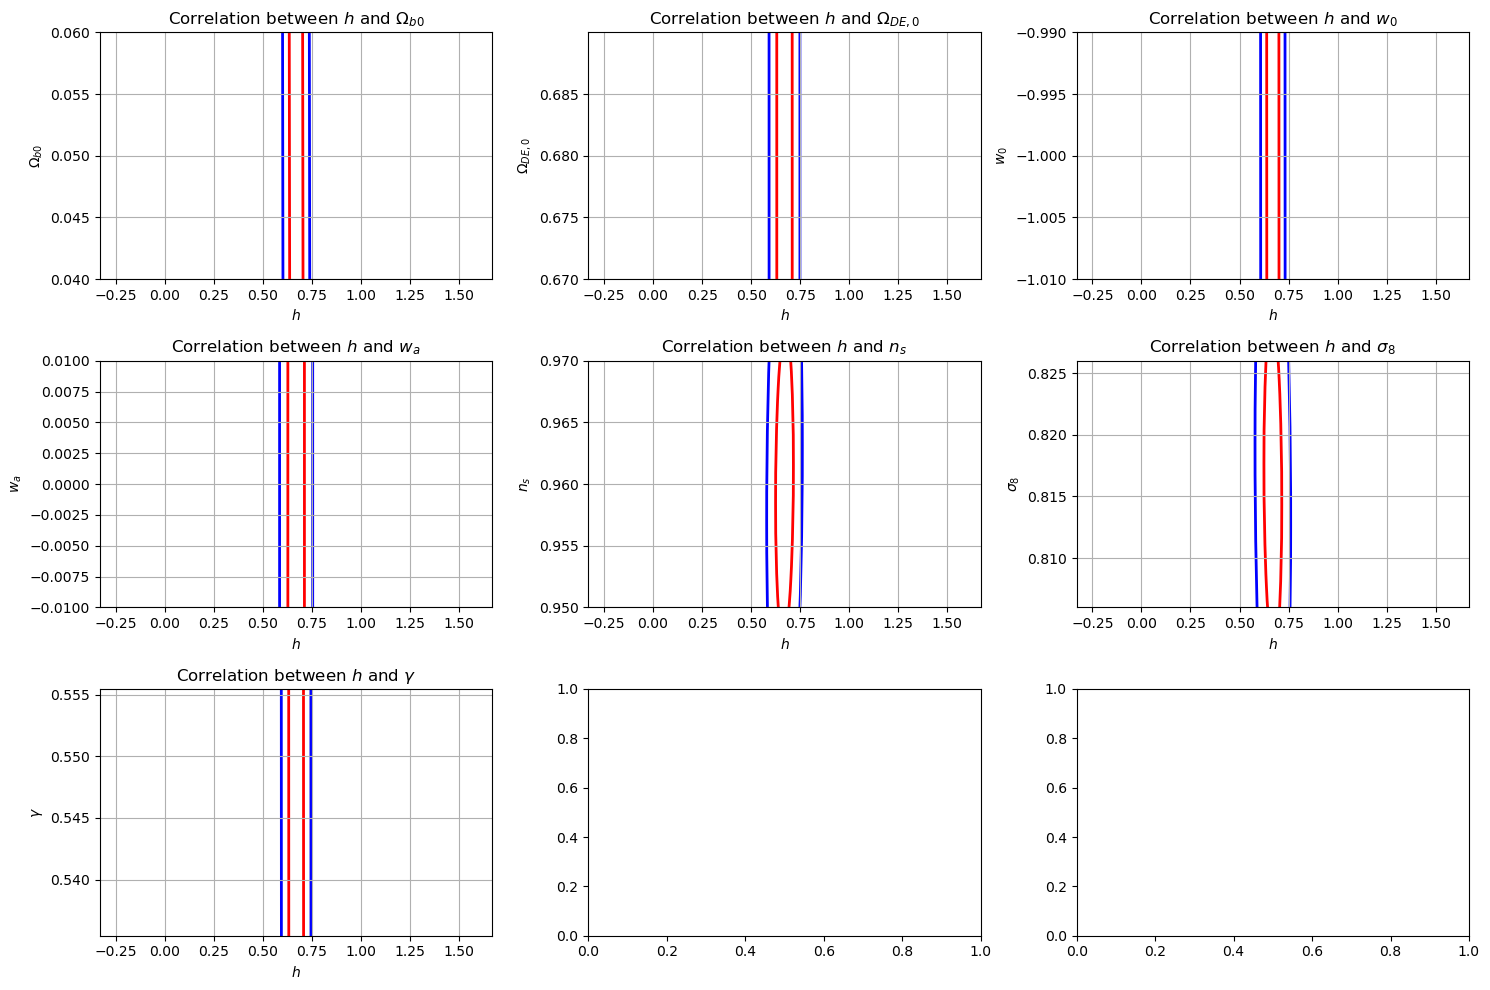

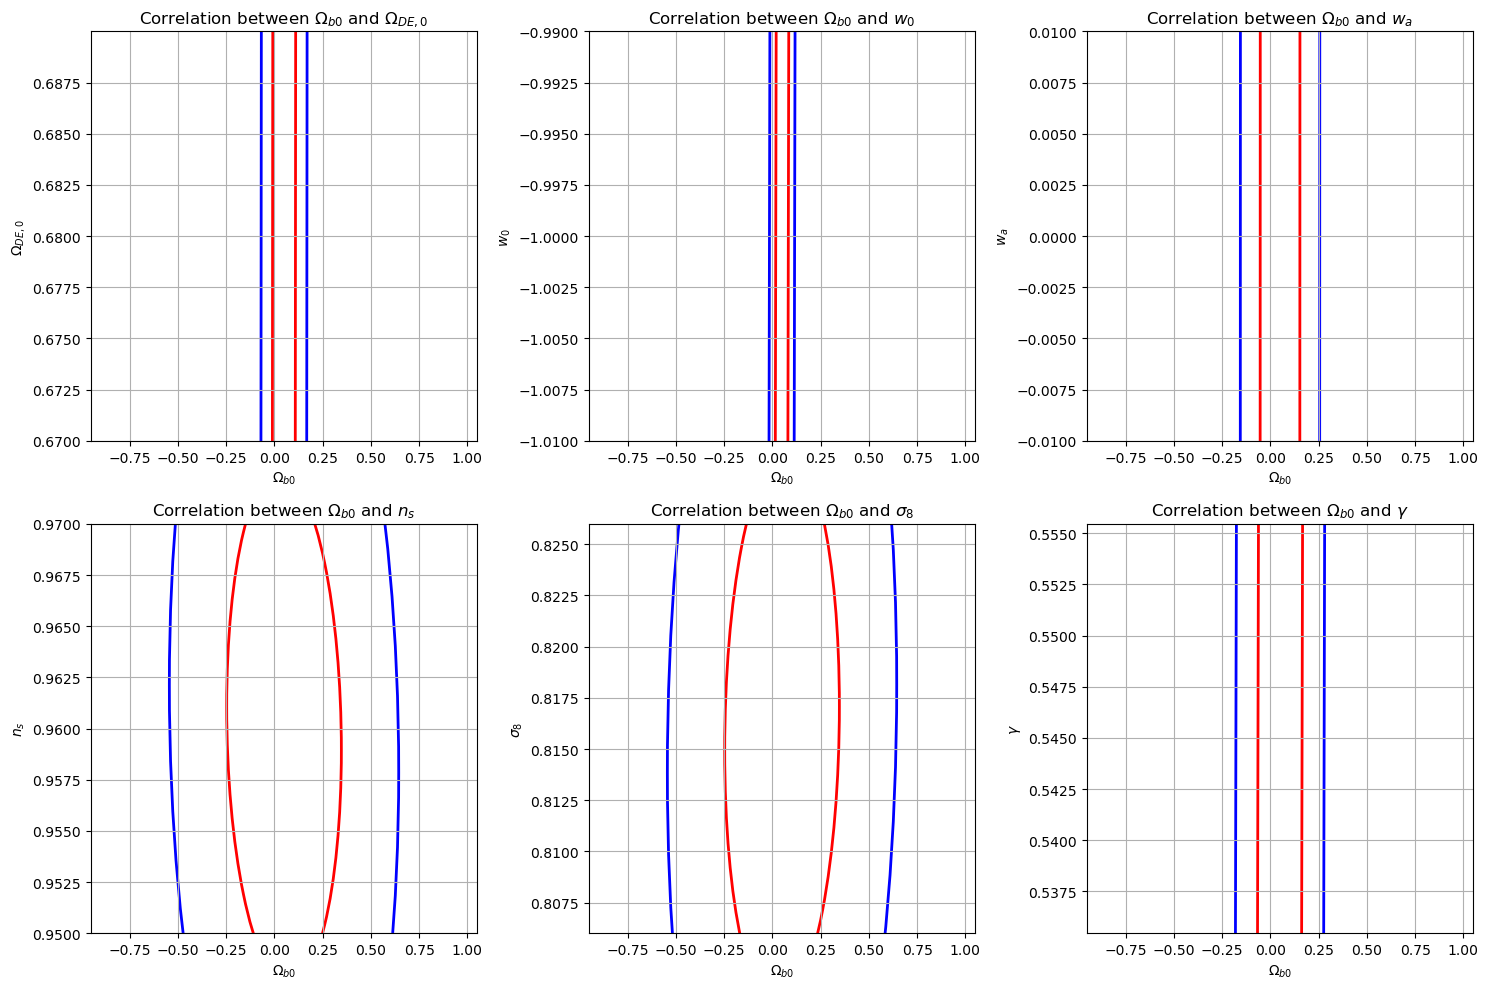

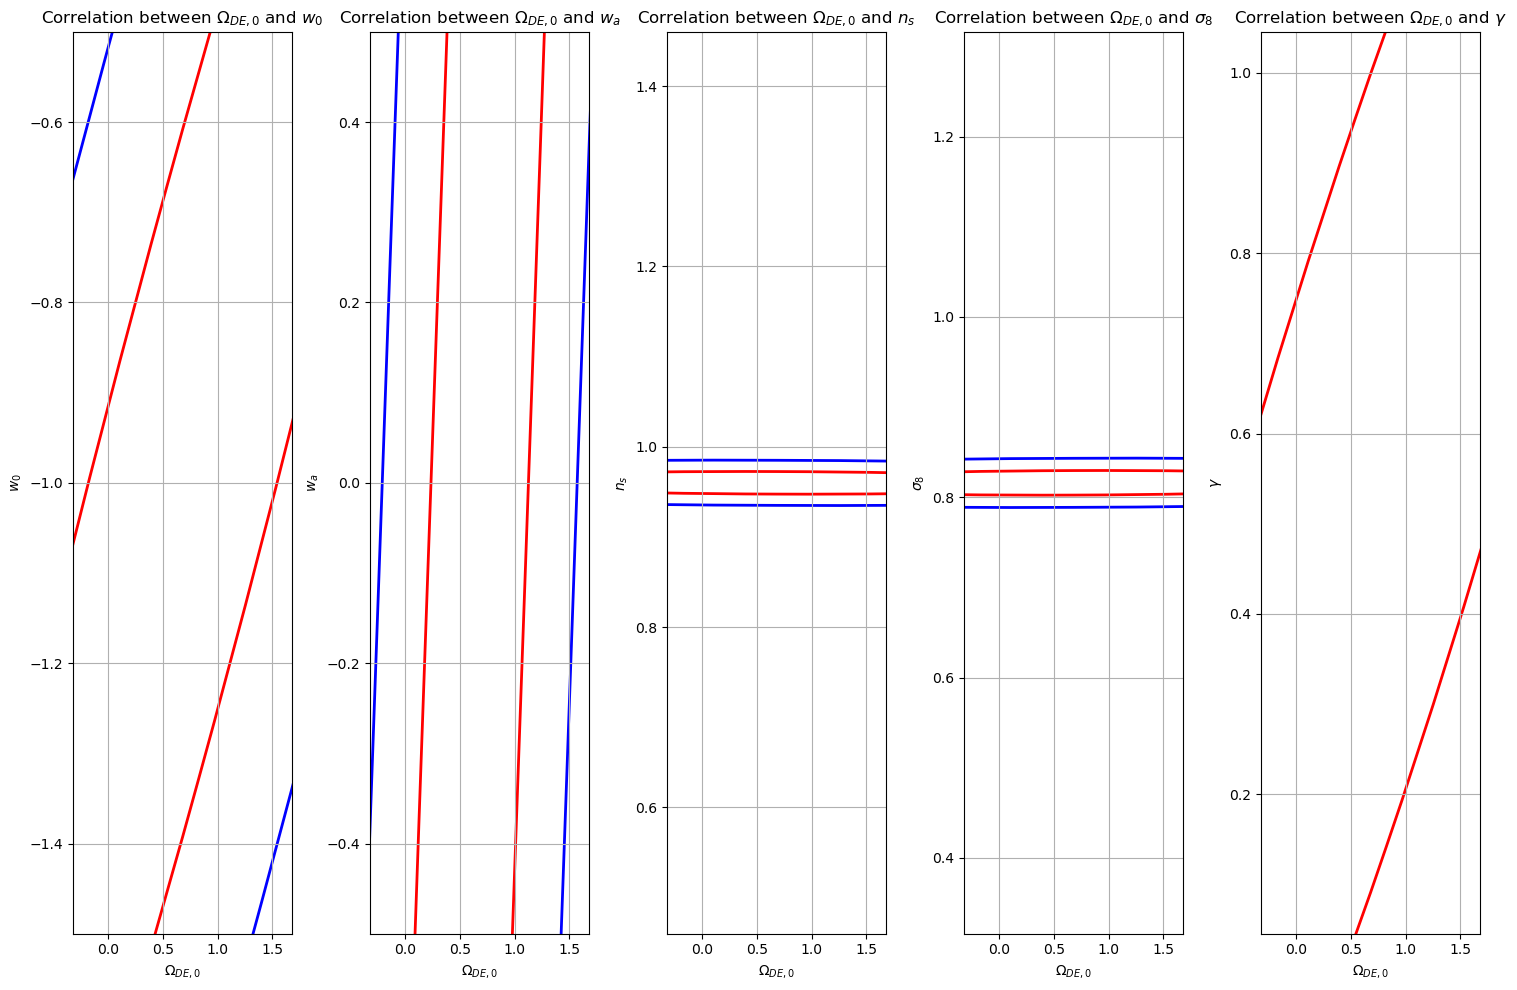

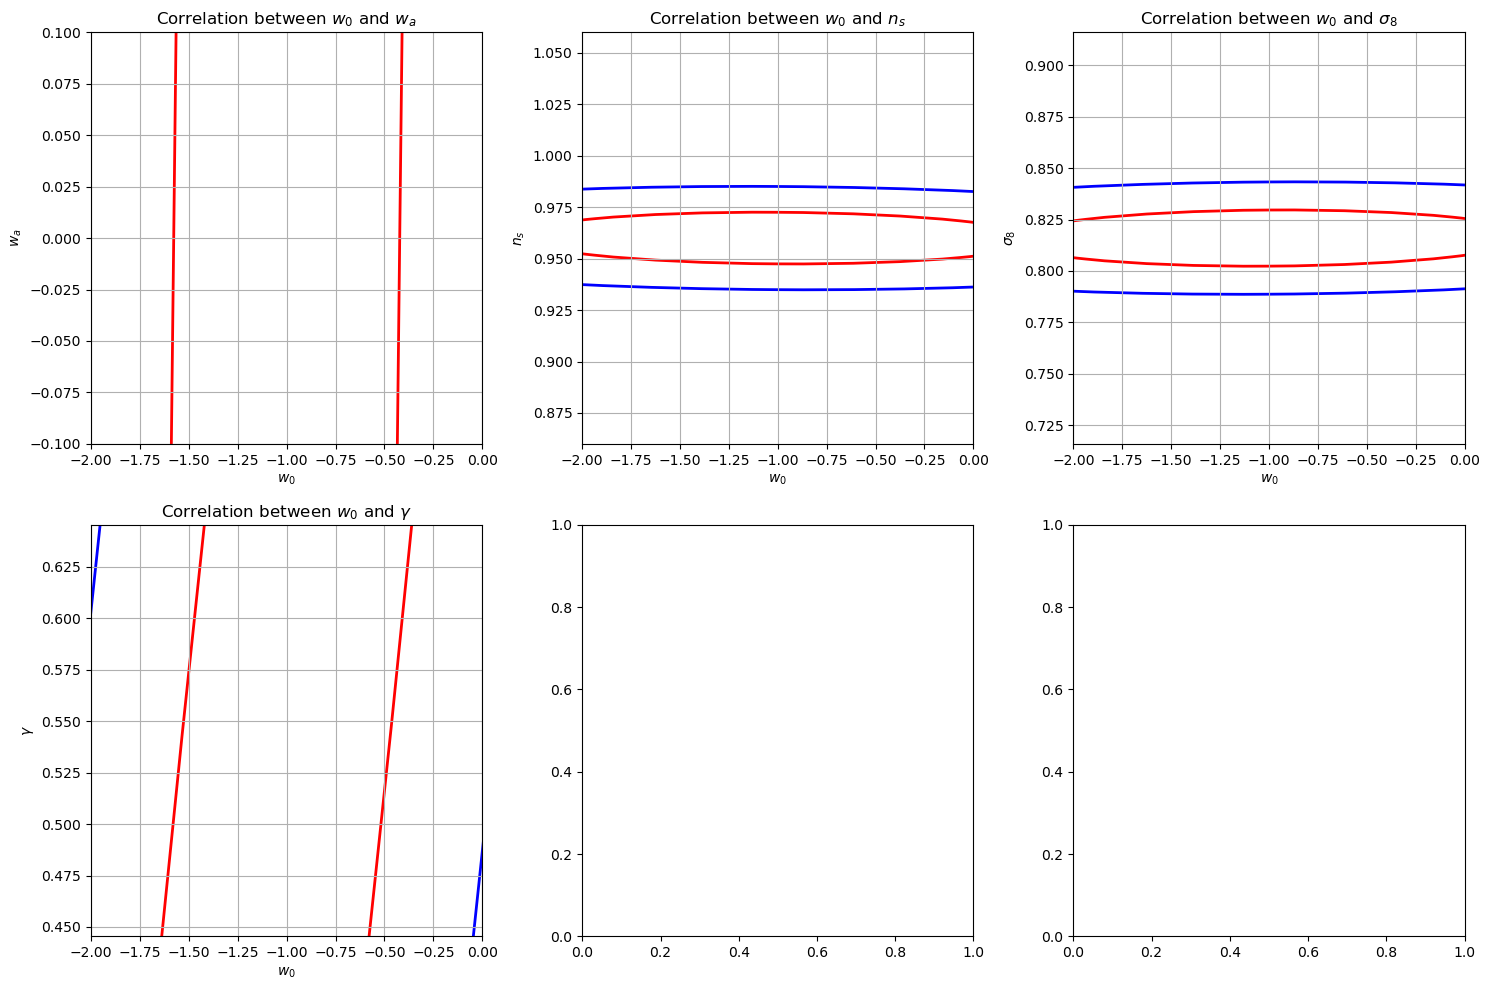

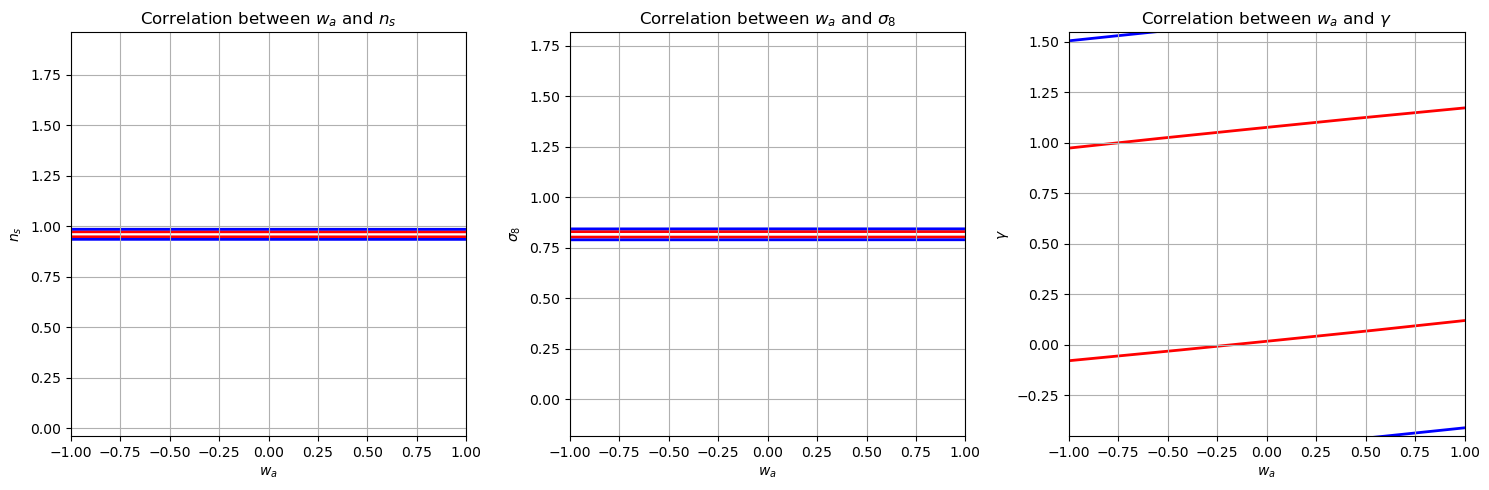

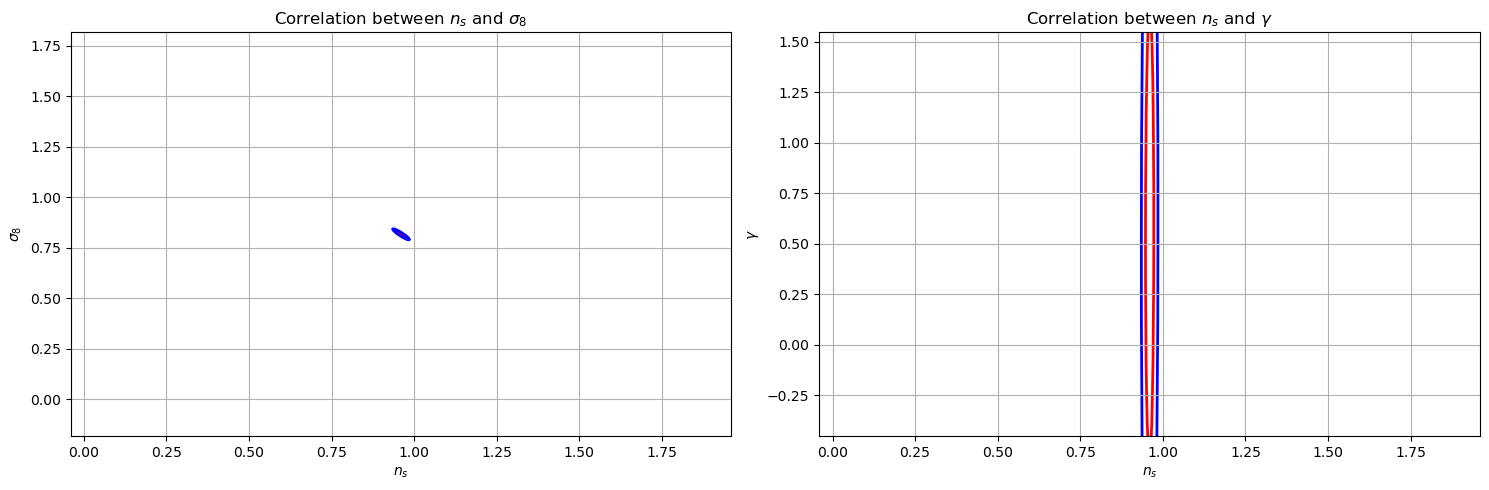

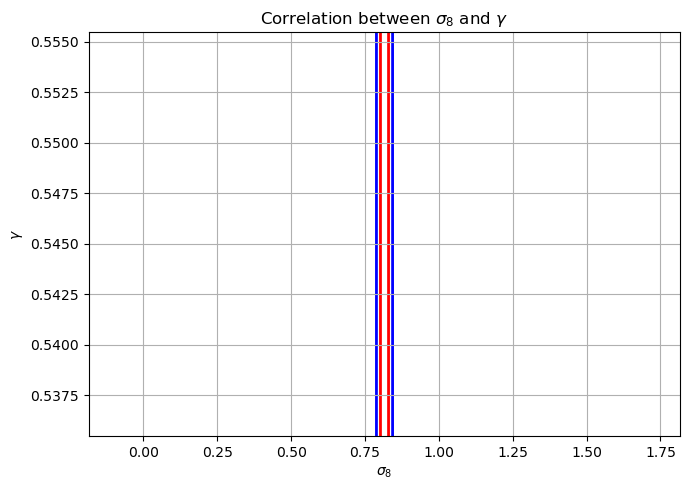

In [158]:
params = [Omega_m0, h, Omega_b0, Omega_DE0, w0, wa, ns, sigma8, gamma]
params_names = ['$\Omega_{m0}$', '$h$', '$\Omega_{b0}$', '$\Omega_{DE,0}$', '$w_0$', '$w_a$', '$n_s$', '$\sigma_8$', '$\gamma$']

# Omega_m0
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i in range(1, 9):
    j = 0
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 1) // 3
    col = (i - 1) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# h
fig, axs = plt.subplots(3, 3, figsize=(15, 10))
for i in range(2, 9):
    j = 1
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 2) // 3
    col = (i - 2) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_b0
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(3, 9):
    j = 2
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 3) // 3
    col = (i - 3) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# Omega_DE0
fig, axs = plt.subplots(1, 5, figsize=(15, 10))
for i in range(4, 9):
    j = 3
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 4]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.5, params[i] + 0.5)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# w0
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i in range(5, 9):
    j = 4
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    row = (i - 5) // 3
    col = (i - 5) % 3
    ax = axs[row, col]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 0.1, params[i] + 0.1)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# wa
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i in range(6, 9):
    j = 5
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 6]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 1, params[i] + 1)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# ns
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
for i in range(7, 9):
    j = 6
    cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
    ax = axs[i - 7]
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
    plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
    ax.set_xlim(params[j] - 1, params[j] + 1)
    ax.set_ylim(params[i] - 1, params[i] + 1)
    ax.set_xlabel(params_names[j])
    ax.set_ylabel(params_names[i])
    ax.grid(True)
    ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()

# gamma
fig, ax = plt.subplots(figsize=(7, 5))
j = 7
i = 8
cov_ij = cov_matrix[np.ix_([j, i], [j, i])]
plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=1, edgecolor='red', lw=2, facecolor='none')
plot_error_ellipse(ax, cov_ij, pos=(params[j], params[i]), nstd=2, edgecolor='blue', lw=2, facecolor='none')
ax.set_xlim(params[j] - 1, params[j] + 1)
ax.set_ylim(params[i] - 0.01, params[i] + 0.01)
ax.set_xlabel(params_names[j])
ax.set_ylabel(params_names[i])
ax.grid(True)
ax.set_title(f'Correlation between {params_names[j]} and {params_names[i]}')
plt.tight_layout()
plt.show()


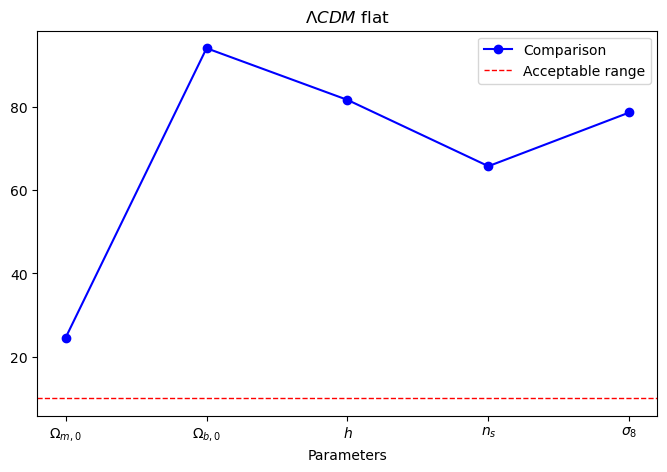

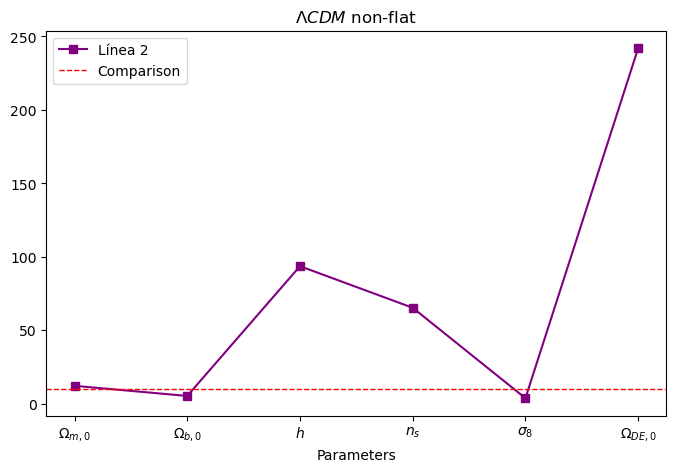

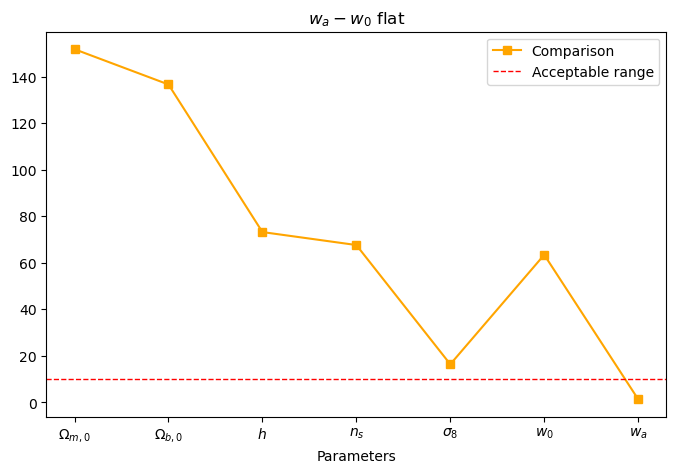

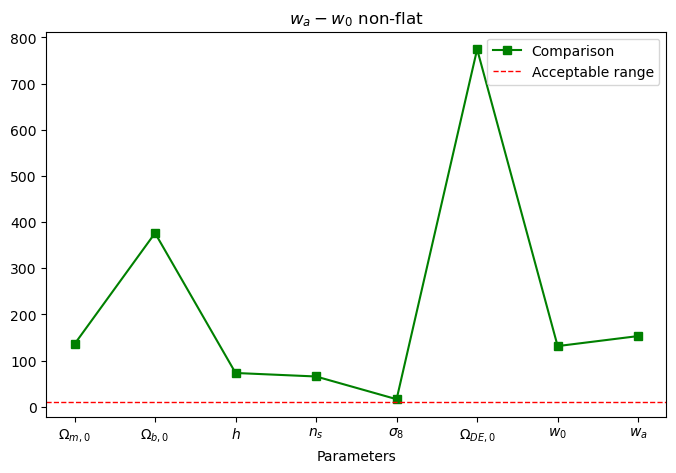

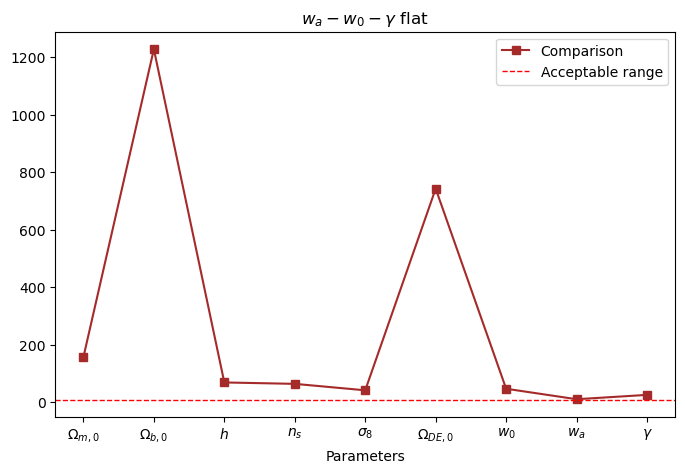

In [33]:
import matplotlib.pyplot as plt

# Datos de ejemplo
x = ['$\Omega_{m,0}$', '$\Omega_{b,0}$', '$h$', '$n_s$', '$\sigma_8$']  # Valores en el eje x (por ejemplo, tiempo)
y1 = [24.566, 94.184, 81.754, 65.808, 78.724]  # Datos para la línea 1
y2 = [12.27, 5.381, 93.684, 65.382, 3.838, 242.000]   # Datos para la línea 2
y3 = [151.72, 136.58, 73.193, 67.619, 16.412, 63.434, 1.400]   # Datos para la línea 2
y4 = [135.76, 376.30, 73.185, 65.590, 16.349, 774.5, 131.45, 153.16]   # Datos para la línea 2
y5 = [157.303, 1228.4, 69.332, 64.456, 42.001, 743.33, 47.436, 10.999, 26.110]   # Datos para la línea 2

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las líneas
ax.plot(x, y1, marker='o', linestyle='-', color='b', label='Comparison')

# Agregar una línea horizontal en y = 10
ax.axhline(y=10, color='red', linestyle='--', linewidth=1, label='Acceptable range')

# Etiquetas de los ejes y título
ax.set_xlabel('Parameters')
ax.set_title('$\Lambda CDM$ flat')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
#plt.grid(True)  # Activar cuadrícula
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las líneas
x = ['$\Omega_{m,0}$', '$\Omega_{b,0}$', '$h$', '$n_s$', '$\sigma_8$', '$\Omega_{DE, 0}$'] 
ax.plot(x, y2, marker='s', linestyle='-', color='purple', label='Línea 2')

# Agregar una línea horizontal en y = 10
ax.axhline(y=10, color='red', linestyle='--', linewidth=1, label='Comparison')

# Etiquetas de los ejes y título
ax.set_xlabel('Parameters')
ax.set_title('$\Lambda CDM$ non-flat')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
#plt.grid(True)  # Activar cuadrícula
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las líneas
x = ['$\Omega_{m,0}$', '$\Omega_{b,0}$', '$h$', '$n_s$', '$\sigma_8$', '$w_0$', '$w_a$'] 
ax.plot(x, y3, marker='s', linestyle='-', color='orange', label='Comparison')

# Agregar una línea horizontal en y = 10
ax.axhline(y=10, color='red', linestyle='--', linewidth=1, label='Acceptable range')

# Etiquetas de los ejes y título
ax.set_xlabel('Parameters')
ax.set_title('$w_a - w_0$ flat')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
#plt.grid(True)  # Activar cuadrícula
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las líneas
x = ['$\Omega_{m,0}$', '$\Omega_{b,0}$', '$h$', '$n_s$', '$\sigma_8$', '$\Omega_{DE, 0}$', '$w_0$', '$w_a$'] 
ax.plot(x, y4, marker='s', linestyle='-', color='green', label='Comparison')

# Agregar una línea horizontal en y = 10
ax.axhline(y=10, color='red', linestyle='--', linewidth=1, label='Acceptable range')

# Etiquetas de los ejes y título
ax.set_xlabel('Parameters')
ax.set_title('$w_a - w_0$ non-flat')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
#plt.grid(True)  # Activar cuadrícula
plt.show()

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las líneas
x = ['$\Omega_{m,0}$', '$\Omega_{b,0}$', '$h$', '$n_s$', '$\sigma_8$', '$\Omega_{DE, 0}$', '$w_0$', '$w_a$', '$\gamma$'] 
ax.plot(x, y5, marker='s', linestyle='-', color='brown', label='Comparison')

# Agregar una línea horizontal en y = 10
ax.axhline(y=10, color='red', linestyle='--', linewidth=1, label='Acceptable range')

# Etiquetas de los ejes y título
ax.set_xlabel('Parameters')
ax.set_title('$w_a - w_0 - \gamma$ flat')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
#plt.grid(True)  # Activar cuadrícula
plt.show()

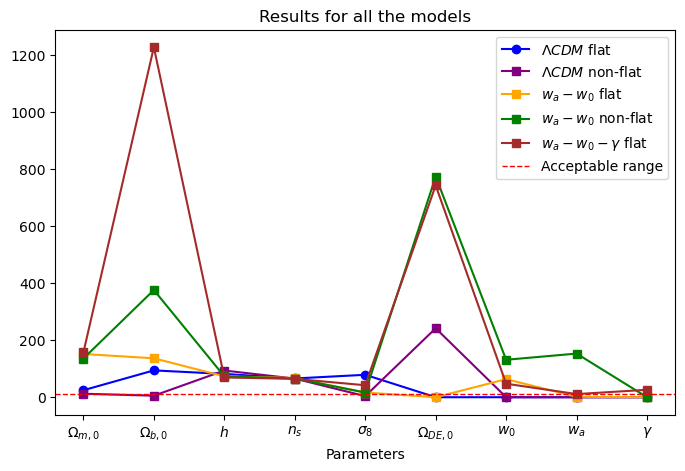

In [38]:
# Datos de ejemplo
x = ['$\Omega_{m,0}$', '$\Omega_{b,0}$', '$h$', '$n_s$', '$\sigma_8$', '$\Omega_{DE, 0}$', '$w_0$', '$w_a$', '$\gamma$']  # Valores en el eje x (por ejemplo, tiempo)
y1 = [24.566, 94.184, 81.754, 65.808, 78.724, 0, 0, 0, 0]  # Datos para la línea 1
y2 = [12.27, 5.381, 93.684, 65.382, 3.838, 242.000, 0, 0, 0]   # Datos para la línea 2
y3 = [151.72, 136.58, 73.193, 67.619, 16.412, 0, 63.434, 1.400, 0]   # Datos para la línea 2
y4 = [135.76, 376.30, 73.185, 65.590, 16.349, 774.5, 131.45, 153.16, 0]   # Datos para la línea 2
y5 = [157.303, 1228.4, 69.332, 64.456, 42.001, 743.33, 47.436, 10.999, 26.110]   # Datos para la línea 2

fig, ax = plt.subplots(figsize=(8, 5))

# Graficar las líneas
ax.plot(x, y1, marker='o', linestyle='-', color='b', label='$\Lambda CDM$ flat')
ax.plot(x, y2, marker='s', linestyle='-', color='purple', label='$\Lambda CDM$ non-flat')
ax.plot(x, y3, marker='s', linestyle='-', color='orange', label='$w_a - w_0$ flat')
ax.plot(x, y4, marker='s', linestyle='-', color='green', label='$w_a - w_0$ non-flat')
ax.plot(x, y5, marker='s', linestyle='-', color='brown', label='$w_a - w_0 - \gamma$ flat')

# Agregar una línea horizontal en y = 10
ax.axhline(y=10, color='red', linestyle='--', linewidth=1, label='Acceptable range')

# Etiquetas de los ejes y título
ax.set_xlabel('Parameters')
ax.set_title('Results for all the models')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
#plt.grid(True)  # Activar cuadrícula
plt.show()